<div style="display: flex; align-items: center; justify-content: center; padding: 20px 0; text-align: center; height: 100vh; max-width: 1500px; margin: auto;">
    <img src="https://media.licdn.com/dms/image/v2/D4D3DAQFGx0XnuUvugA/image-scale_191_1128/image-scale_191_1128/0/1662458005755/nova_ims_information_management_school_cover?e=2147483647&v=beta&t=J3Q4LlZi36_4UAFhj2019QdtfXLn0kQwaX25jgaBhOQ" 
         alt="Logo" 
         style="width: 100%; max-width: 1500px; height: auto; max-height: 200px; object-fit: cover; object-position: center; border: 5px solid #A0C020; border-radius: 5px;">
</div>

<div style="text-align: center; padding: 20px 0;">
    <h5>This analysis is conducted as part of the <b><i>Machine Learning</i></b> course, a component of the Master's program in Data Science and Advanced Analytics at the <b><u>Nova Information Management School</u></b>.</h5>
</div>
<!-- This notebook template was created by Catarina Gonçalves Nunes, 20230083 -->
<div style="text-align: center; color: #A0C020;">
    <h1><b>To Grant or Not to Grant: Deciding on Compensation Benefits</b></h1>
</div>


<h3 style="text-align: center;"><u></b>Group 22</u></b></h3>

|     Student Name     |     Student ID     | 
|         ---          |           ---          |
|     Beatriz Monteiro     |   20240591        | 
|     Catarina Nunes          |       20230083       |
|     Jorge Cordeiro      |       20240594       |
|     Leonor Wanzeller   |      20240586       |

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h2 style="color: white; margin: 0;">Importing Libraries</h2>
</div>

In [40]:
import zipfile, io
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, classification_report, ConfusionMatrixDisplay
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC  
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV
from itertools import combinations
from itertools import combinations, product
import warnings
warnings.filterwarnings("ignore")
pd.set_option('future.no_silent_downcasting', True)

In [41]:
# We compose a pallete to use in the vizualizations
pal_novaims = ['#A0C020','#003B5C', '#FF8C00', '#D3D3D3','#6A5ACD']

In [42]:
#this codes are from NAICS - https://www.bls.gov/iag/tgs/iag_index_naics.htm

industry_mapping = {
    'Industry_high_0': ['MANAGEMENT OF COMPANIES AND ENTERPRISES'],
    'Industry_high_1': [
        'HEALTH CARE AND SOCIAL ASSISTANCE', 'MANUFACTURING', 'FINANCE AND INSURANCE',
        'REAL ESTATE AND RENTAL AND LEASING', 'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)',
        'RETAIL TRADE', 'ACCOMMODATION AND FOOD SERVICES', 'MINING',
        'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES', 'ARTS, ENTERTAINMENT, AND RECREATION'],
    'Industry_high_2': ['EDUCATIONAL SERVICES'],
    'Industry_high_3_mid_5': [
        'CONSTRUCTION', 'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT',
        'TRANSPORTATION AND WAREHOUSING', 'WHOLESALE TRADE'],
    'Industry_high_4': ['UTILITIES', 'PUBLIC ADMINISTRATION'],
    'Industry_high_5': ['INFORMATION'],
    'Industry_high_3_2': ['AGRICULTURE, FORESTRY, FISHING AND HUNTING']}



nature_of_injury_mapping = {
    'Nature of Injury Cluster 10': ['BYSSINOSIS', 'BLACK LUNG', 'VDT - RELATED DISEASES'],
    'Nature of Injury Cluster 4': ['ENUCLEATION', 'HERNIA', 'MENTAL DISORDER'],
    'Nature of Injury Cluster 17': ['DISLOCATION'],
    'Nature of Injury Cluster 15': ['FRACTURE', 'SEVERANCE', 'CRUSHING', 'CARPAL TUNNEL SYNDROME'],
    'Nature of Injury Cluster 1': ['AMPUTATION'],
    'Nature of Injury Cluster 9': ['RUPTURE'],
    'Nature of Injury Cluster 6': ['SILICOSIS'],
    'Nature of Injury Cluster 16': ['MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND PSYCHOLOGICAL', 'MENTAL STRESS',
                                'ALL OTHER SPECIFIC INJURIES, NOC', 'INFLAMMATION', 'ALL OTHER CUMULATIVE INJURY, NOC', 'CONTUSION'],
    'Nature of Injury Cluster 12': ['SPRAIN OR TEAR', 'CONCUSSION', 'MULTIPLE PHYSICAL INJURIES ONLY', 'STRAIN OR TEAR', 'DUST DISEASE, NOC'],
    'Nature of Injury Cluster 0': ['ASBESTOSIS'],
    'Nature of Injury Cluster 2': ['COVID-19', 'VISION LOSS', 'FREEZING', 'BURN', 'AIDS', 'ELECTRIC SHOCK', 'INFECTION', 'LACERATION',
                               'POISONING - CHEMICAL, (OTHER THAN METALS)', 'RESPIRATORY DISORDERS', 'FOREIGN BODY', 'HEAT PROSTRATION',
                               'POISONING - GENERAL (NOT OD OR CUMULATIVE'],
    'Nature of Injury Cluster 14': ['ASPHYXIATION'],
    'Nature of Injury Cluster 8': ['VASCULAR'],
    'Nature of Injury Cluster 5': ['ANGINA PECTORIS', 'POISONING - METAL', 'MYOCARDIAL INFARCTION',
                               'ADVERSE REACTION TO A VACCINATION OR INOCULATION', 'DERMATITIS', 'NO PHYSICAL INJURY',
                               'CONTAGIOUS DISEASE', 'SYNCOPE', 'PUNCTURE', 'RADIATION'],
    'Nature of Injury Cluster 3': ['CANCER'],
    'Nature of Injury Cluster 13': ['ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC'],
    'Nature of Injury Cluster 7': ['LOSS OF HEARING', 'HEARING LOSS OR IMPAIRMENT'],
    'Nature of Injury Cluster 11': ['HEPATITIS C']}


#https://www.guarantysupport.com/wp-content/uploads/2024/02/WCIO-Legacy.pdf & https://www.mwcia.org/Media/Default/PDF/NewsFeed/Circulars/21-1787.pdf

WCIO_Cause_map = {
    'Cause of Injury Cluster 11': ['CRASH OF RAIL VEHICLE'],
    'Cause of Injury Cluster 15': ['FROM LADDER OR SCAFFOLDING', 'MOTOR VEHICLE', 'VEHICLE UPSET',
                               'COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE', 'MOTOR VEHICLE, NOC'],
    'Cause of Injury Cluster 10': ['GUNSHOT'],
    'Cause of Injury Cluster 0': ['COLLAPSING MATERIALS (SLIDES OF EARTH)', 'MOVING PARTS OF MACHINE',
                              'JUMPING OR LEAPING', 'MACHINE OR MACHINERY', 'SLIP, OR TRIP, DID NOT FALL',
                              'STRAIN OR INJURY BY, NOC', 'MOVING PART OF MACHINE', 'WIELDING OR THROWING'],
    'Cause of Injury Cluster 14': ['INTO OPENINGS', 'LIFTING', 'ON STAIRS', 'CRASH OF AIRPLANE', 'HOLDING OR CARRYING',
                               'TWISTING', 'FALL, SLIP OR TRIP, NOC', 'FROM LIQUID OR GREASE SPILLS', 'ON SAME LEVEL',
                               'COLLISION WITH A FIXED OBJECT', 'ON ICE OR SNOW'],
    'Cause of Injury Cluster 4': ['FROM DIFFERENT LEVEL (ELEVATION)', 'REACHING', 'USING TOOL OR MACHINERY'],
    'Cause of Injury Cluster 8': ['EXPLOSION OR FLARE BACK', 'CRASH OF WATER VEHICLE', 'FIRE OR FLAME', 
                              'POWERED HAND TOOL, APPLIANCE', 'SANDING, SCRAPING, CLEANING OPERATION',
                              'FALLING OR FLYING OBJECT', 'CAUGHT IN, UNDER OR BETWEEN, NOC', 'HAND TOOL OR MACHINE IN USE',
                              'OBJECT HANDLED', 'STRIKING AGAINST OR STEPPING ON, NOC', 'FELLOW WORKER, PATIENT OR OTHER PERSON',
                              'OBJECT HANDLED BY OTHERS', 'ELECTRICAL CURRENT', 'STRUCK OR INJURED, NOC', 'STATIONARY OBJECT',
                              'STEAM OR HOT FLUIDS', 'WELDING OPERATION', 'OBJECT BEING LIFTED OR HANDLED'],
    'Cause of Injury Cluster 12': ['PUSHING OR PULLING', 'PERSON IN ACT OF A CRIME'],
    'Cause of Injury Cluster 6': ['REPETITIVE MOTION', 'CUMULATIVE, NOC'],
    'Cause of Injury Cluster 13': ['PANDEMIC', 'OTHER - MISCELLANEOUS, NOC', 'OTHER THAN PHYSICAL CAUSE OF INJURY',
                               'ABSORPTION, INGESTION OR INHALATION, NOC'],
    'Cause of Injury Cluster 3': ['BROKEN GLASS', 'HOT OBJECTS OR SUBSTANCES', 'TEMPERATURE EXTREMES', 'STEPPING ON SHARP OBJECT',
                              'CHEMICALS', 'COLD OBJECTS OR SUBSTANCES', 'RUBBED OR ABRADED, NOC', 'CONTACT WITH, NOC',
                              'ANIMAL OR INSECT', 'CUT, PUNCTURE, SCRAPE, NOC', 'HAND TOOL, UTENSIL; NOT POWERED',
                              'RADIATION', 'FOREIGN MATTER (BODY) IN EYE(S)', 'MOLD'],
    'Cause of Injury Cluster 5': ['TERRORISM'],
    'Cause of Injury Cluster 9': ['CONTINUAL NOISE'],
    'Cause of Injury Cluster 7': ['DUST, GASES, FUMES OR VAPORS'],
    'Cause of Injury Cluster 2': ['ABNORMAL AIR PRESSURE'],
    'Cause of Injury Cluster 1': ['NATURAL DISASTERS']}

part_of_body_mapping = {
    'Part Of Body Cluster 3': ['WHOLE BODY', 'HEART'],
    'Part Of Body Cluster 10': ['INTERNAL ORGANS'],
    'Part Of Body Cluster 9': ['LUNGS', 'BODY SYSTEMS AND MULTIPLE BODY SYSTEMS', 'NO PHYSICAL INJURY'],
    'Part Of Body Cluster 6': ['BRAIN', 'SPINAL CORD'],
    'Part Of Body Cluster 7': ['INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLASSIFIED', 'WRIST (S) & HAND(S)'],
    'Part Of Body Cluster 4': ['CHEST', 'SKULL', 'BUTTOCKS', 'SOFT TISSUE', 'MULTIPLE HEAD INJURY',
                           'ABDOMEN INCLUDING GROIN', 'LOWER LEG', 'LOWER ARM', 'HAND', 'FACIAL BONES',
                           'FOOT', 'GREAT TOE', 'MULTIPLE LOWER EXTREMITIES', 'NOSE', 'SACRUM AND COCCYX', 'TOES', 'UPPER LEG'],
    'Part Of Body Cluster 2': ['MULTIPLE BODY PARTS (INCLUDING BODY', 'MULTIPLE NECK INJURY', 'LOWER BACK AREA',
                           'LUMBAR & OR SACRAL VERTEBRAE (VERTEBRA', 'UPPER BACK AREA', 'DISC', 'MULTIPLE TRUNK',
                           'PELVIS', 'VERTEBRAE'],
    'Part Of Body Cluster 1': ['MOUTH', 'EYE(S)', 'FINGER(S)', 'LARYNX', 'TEETH', 'THUMB'],
    'Part Of Body Cluster 12': ['MULTIPLE', 'KNEE', 'ELBOW', 'ANKLE', 'SHOULDER(S)', 'MULTIPLE UPPER EXTREMITIES', 'WRIST'],
    'Part Of Body Cluster 0': ['UPPER ARM', 'HIP'],
    'Part Of Body Cluster 5': ['ARTIFICIAL APPLIANCE'],
    'Part Of Body Cluster 8': ['EAR(S)'],
    'Part Of Body Cluster 11': ['TRACHEA']}

# Dictionary to map 'Carrier Type' 

carrier_type_mapping = {
    "Private Carriers": ["1A. PRIVATE", "4A. SELF PRIVATE"],
    "Public Carriers": ["3A. SELF PUBLIC", "2A. SIF"],
    "SF_0_3": ["5C. SPECIAL FUND - POI CARRIER WCB MENANDS"],
    "SF_0_2": ["5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)"],
    "SF_2_1": ["5D. SPECIAL FUND - UNKNOWN"],
    "Unknown": ["UNKNOWN"]}

<a id = "idx"></a>

<div style="background-color: #A0C020; padding: 10px; border-radius: 8px; text-align: center; margin-top: 20px; margin-bottom: 20px;">
    <h1 style="color: white; margin: 0;">Index</h1>
</div>

1. [Data Loading & Initial Setup](#IS)
2. [Preprocessing Pipelines](#PPips)
3. [Feature Selection](#feature-selection)
   
    - 3.1. [Spearman](#spearman)
   
    - 2.2. [Mutual Information](#MIEC)

    - 2.3. [LASSO Logistic Regression](#lasso)
      
    - 2.4. [Decision Tree](#DT)
      
    - 2.5. [Random Forest](#RF)
      
    - 2.6. [Results](#results)

2. [Modelling](#modelling)

<a id = "IS"></a>

<div style="background-color: #003B5C; padding: 10px; border-radius: 8px; text-align: left; margin-top: 20px; margin-bottom: 20px;">
    <h2 style="color: white; margin: 0;">1. Data Loading and Initial Setup</h2>
</div>

[Back to Index](#idx)

In [45]:
z = zipfile.ZipFile("project_data.zip") #we loaded the project data folder zip in the same
#environment and use this code to extract the components
z.extractall()

del z

In [46]:
# Load datasets
train_data = pd.read_csv("train_data.csv")  
test = pd.read_csv("test_data.csv")

print('Train df shape:', train_data.shape)
print('Test df shape:', test.shape)

Train df shape: (593471, 33)
Test df shape: (387975, 30)


In [47]:
# Set Claim Identifier as the index for both datasets
train_data.set_index('Claim Identifier', inplace=True)
test.set_index('Claim Identifier', inplace=True)

In [48]:
train_to_split = train_data.copy()
target_features = train_to_split.columns.difference(test.columns).tolist()

#We will preprocess the test data as well to ensure consistency in variable creation 
#and data types required for our models to function correctly, without removing any rows.

In [49]:
columns_of_interest = train_to_split.columns[train_to_split.isnull().sum() == 19445]
# Drop rows where all columns in columns_of_interest have NaN values
train_to_split = train_to_split.dropna(subset=columns_of_interest, how='all')
train_to_split = train_to_split.drop(columns = 'OIICS Nature of Injury Description')
test = test.drop(columns = 'OIICS Nature of Injury Description')

In [50]:
X = train_to_split.drop(columns=target_features)
y = train_to_split[['Agreement Reached']]

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, stratify=y, shuffle=True, random_state=42)

In [51]:
y['Agreement Reached'] = y['Agreement Reached'].astype('int32')

y = y.squeeze()

In [52]:
train = X_train.copy()
val = X_val.copy()

print(train.shape, val.shape)
print(y_train.shape, y_val.shape)

(401818, 28) (172208, 28)
(401818, 1) (172208, 1)


In [53]:
print(y_train['Agreement Reached'].unique())

[0. 1.]


In [54]:
y_train['Agreement Reached'] = y_train['Agreement Reached'].astype('int32')
y_val['Agreement Reached'] = y_val['Agreement Reached'].astype('int32')

In [55]:
y_train_bin = y_train.copy()
y_val_bin = y_val.copy()

In [56]:
# Count class distribution in y_train_multi 
unique, counts = np.unique(y_train_bin, return_counts=True)
result = dict(zip(unique, counts))
print("Class distribution of Y:", result)

Class distribution of Y: {0: 383067, 1: 18751}


The results indicate that the original training dataset has a considerable class imbalance, with the category 1.0 appearing much less frequently than the category 0.0. To address this issue, we may apply SMOTE (Synthetic Minority Over-sampling Technique), which artificially increases the number of samples in the minority classe by generating synthetic examples.

While SMOTE successfully balances the class distribution, it also leads to a substantial increase in the size of the training dataset. This growth can introduce several potential challenges, such as computational overload due to increased memory and processing demands, ultimately resulting in longer training times.

In [58]:
del train_to_split

<a id = "PPips"></a>

<div style="background-color: #003B5C; padding: 10px; border-radius: 8px; text-align: left; margin-top: 20px; margin-bottom: 20px;">
    <h2 style="color: white; margin: 0;">2. Preprocessing Pipelines</h2>
</div>

[Back to Index](#idx)

### 1. Data Types, Feature Engineering, Missing Values, Outliers and Variable Pre Selection (and also some grouping)

In [61]:
def preprocessing_pipeline(train, val=None, test=None, outlier_treatment=True):
    debug_info = {}
    # Geral configurations
    covid_start = pd.Timestamp('2020-03-01')
    covid_end = pd.Timestamp('2021-12-31')

    binary_columns = ['Attorney/Representative', 'COVID-19 Indicator']
    columns_to_replace = ['Age at Injury', 'Average Weekly Wage', 'Birth Year']
    description_columns = [
    ('Industry Code', 'Industry Code Description'),
    ('WCIO Cause of Injury Code', 'WCIO Cause of Injury Description'),
    ('WCIO Nature of Injury Code', 'WCIO Nature of Injury Description'),
    ('WCIO Part Of Body Code', 'WCIO Part Of Body Description')]

    variables_to_treat_outliers = ['Age at Injury']
    iqr_threshold = 1.5

    cols_to_impute = {
        'mode': [['Gender', 'Alternative Dispute Resolution', 'Industry Code Description', 'WCIO Nature of Injury Description', 
                     'WCIO Cause of Injury Description', 'WCIO Part Of Body Description']],
        'knn': ['Age at Injury']}
    columns_to_remove = [
        'First Hearing Date', 'C-3 Date', 'IME-4 Count', 'Average Weekly Wage', 'Birth Year', 
        'COVID-19 Indicator', 'Accident Date', 'Assembly Date', 'C-2 Date', 
        'Carrier Name', 'County of Injury', 'District Name', 'Zip Code', 'Industry Code',
        'WCIO Cause of Injury Code',  
        'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Industry Code Description', 
        'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 
        'WCIO Part Of Body Description', 'Carrier Type']

    def debug_step(name, df):
        """Imprime informações úteis sobre o estado do dataframe."""
        #print(f"DEBUG [{name}] - Shape: {df.shape}, Nulls: {df.isnull().sum().sum()}")
        debug_info[name] = {"shape": df.shape, "null_count": df.isnull().sum().sum()}
    
    def convert_to_binary(df, columns):
        for col in columns:
            df[col] = (df[col] == 'Y').astype(int)
        debug_step("convert_to_binary", df)
        return df

    def convert_numeric_columns(df):
        numeric_cols = df.select_dtypes(['int64', 'float64']).columns
        df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)
        #debug_step("convert_numeric_columns", df)
        return df

    def convert_categorical_and_dates(df):
        for col in df.select_dtypes(['object', 'category']).columns:
            if 'Date' in col:
                df[col] = pd.to_datetime(df[col], errors='coerce')
            else:
                df[col] = df[col].astype('category')
        return df
        #debug_step("convert_categorical_and_dates", df)

    def add_covid_flag(df, covid_start, covid_end):
        df['COVID Period'] = ((df['Accident Date'] >= covid_start) & 
                              (df['Accident Date'] <= covid_end)).astype(int)
        #debug_step("add_covid_flag", df)
        return df

    def winsorize_with_iqr(df, columns, iqr_threshold):
        bounds = {}
        for col in columns:
            q1, q3 = df[col].quantile([0.25, 0.75])
            iqr = q3 - q1
            lower = q1 - iqr_threshold * iqr
            upper = q3 + iqr_threshold * iqr
            df[col] = df[col].clip(lower, upper)
            bounds[col] = (lower, upper)
            print(f"Bounds for {col}: Lower = {lower}, Upper = {upper}")
        #debug_step("winsorize_with_iqr", df)
        return df, bounds
        
    def process_missing_values(df, is_train=False, cols_to_impute=None, imputers=None, scalers=None):
        if imputers is None:
            imputers = {'mode': {}, 'knn': {}}
        if scalers is None:
            scalers = {}
        
        # imputing 'mode' with 'most_frequent'
        for col_group_list in cols_to_impute['mode']:
            for col_group in col_group_list:
                if is_train:
                    if col_group not in imputers['mode']:
                        imputers['mode'][col_group] = SimpleImputer(strategy='most_frequent')
                    df[col_group] = imputers['mode'][col_group].fit_transform(df[[col_group]]).ravel()
                else:
                    if col_group in imputers['mode']:
                        df[col_group] = imputers['mode'][col_group].transform(df[[col_group]]).ravel()
    
        # KNN 
        for col in cols_to_impute['knn']:
            if is_train:
                # train data only
                scaler = StandardScaler()
                knn_imputer = KNNImputer(n_neighbors=5)
                df_scaled = scaler.fit_transform(df[[col]])
                df[col] = knn_imputer.fit_transform(df_scaled).ravel()
                scalers[col] = scaler
                imputers['knn'][col] = knn_imputer
            else:
                # based on the train imputers and scalers
                if col in scalers and col in imputers['knn']:
                    df_scaled = scalers[col].transform(df[[col]])
                    df[col] = imputers['knn'][col].transform(df_scaled).ravel()
            
        for col in cols_to_impute['knn']:
            if col in scalers:
                df[col] = scalers[col].inverse_transform(df[[col]]).ravel()
            
        return df, imputers, scalers


    def process_gender_and_alternative_dispute(df):
        if 'Gender' in df.columns:
            df['Gender'] = np.where(df['Gender'].isin(['U', 'X']), np.nan, df['Gender'])
        if 'Alternative Dispute Resolution' in df.columns:
            df['Alternative Dispute Resolution'] = np.where(df['Alternative Dispute Resolution'] == 'U', 
                                                            np.nan, 
                                                            df['Alternative Dispute Resolution'])
        return df
        debug_step("process_gender_and_alternative_dispute", df)
   
    #Columns categorization
    
    def categorize_delay_days(x):
        if pd.isna(x) or x < 0:
            return 'Invalid'
        elif x <= 30:
            return "Short delays (0-30 days)"
        elif x <= 180:
            return "Medium delays (31-180 days)"
        elif x <= 365:
            return "Long delays (181-365 days)"
        else:
            return "Very long delays (>365 days)"
        debug_step("categorize_delay_days", df)

    def categorize_missing_info(df):
        def categorize(x):
            if x == 0:
                return "No missing information"
            elif x <= 2:
                return "Low missing information"
            elif x <= 4:
                return "Moderate missing information"
            elif x <= 8:
                return "High missing information"
            else:
                return "Very high missing information"
        
        df['missing_info_category'] = df.isna().sum(axis=1).apply(categorize)
        debug_step("categorize_missing_info", df)
        return df

    def categorize_wage(x):
        if pd.isna(x) or x <= 0:
            return 'Invalid'
        elif x <= 702:
            return 'Very Low Income'
        elif x <= 1100:
            return 'Low Income'
        elif x <= 1600:
            return 'Middle Income'
        elif x <= 3000:
            return 'Upper Middle Income (Q3 to Upper Fence)'
        else:
            return 'High Income (> Upper Fence)'
        debug_step("categorize_wage", df)

    def categorize_ime4_count(count):
        if pd.isna(count) or count < 0:
            return 'Invalid'
        elif count < 1:
            return "Low IME-4 Count"
        elif 1 <= count <= 2:
            return "Low IME-4 Count"
        elif 2 < count <= 4:
            return "Medium IME-4 Count"
        elif 4 < count <= 8.5:
            return "High IME-4 Count"
        else:
            return "Very High IME-4 Count"
        debug_step("categorize_ime4_count", df)

    def check_missing_dates(row):
        missing_columns = [
            col for col in ["Accident Date", "C-3 Date", "C-2 Date", "Assembly Date", "First Hearing Date"] 
            if pd.isna(row[col])]
        return ", ".join(missing_columns) if missing_columns else "OK"
        debug_step("check_missing_dates", df)

    def validate_dates(df):
        # Rule 1: Assembly Date before Accident Date
        df["Assembly Date before Accident Date"] = df.apply(lambda row: 
            1 if pd.notna(row["Accident Date"]) and pd.notna(row["Assembly Date"]) and row["Assembly Date"] < row["Accident Date"] 
            else 0, axis=1)
        
        # Rule 2: C-2 or C-3 Date before Accident Date
        df["C-2 or C-3 Date before Accident Date"] = df.apply(lambda row: 
            1 if pd.notna(row["Accident Date"]) and any([
                pd.notna(row["C-2 Date"]) and row["C-2 Date"] < row["Accident Date"],
                pd.notna(row["C-3 Date"]) and row["C-3 Date"] < row["Accident Date"]
            ]) 
            else 0, axis=1)
    
        # Rule 3: C-2 or C-3 Date after Assembly Date
        df["C-2 or C-3 Date after Assembly Date"] = df.apply(lambda row: 
            1 if pd.notna(row["Assembly Date"]) and any([
                pd.notna(row["C-2 Date"]) and row["C-2 Date"] > row["Assembly Date"],
                pd.notna(row["C-3 Date"]) and row["C-3 Date"] > row["Assembly Date"]
            ]) 
            else 0, axis=1)
        debug_step("validate_dates", df)
        return df

    # Funções de mapeamento para diferentes descrições
    def industry_map(description):
        for category, descriptions in industry_mapping.items():
            if description in descriptions:
                return category
        return "Unmapped"
    
    def nature_of_injury_map(description):
        for category, descriptions in nature_of_injury_mapping.items():
            if description in descriptions:
                return category
        return "Unmapped"
    
    def map_cause(description):
        for category, descriptions in WCIO_Cause_map.items():
            if description in descriptions:
                return category
        return "Unmapped"
    
    def map_part_of_body(description):
        for category, descriptions in part_of_body_mapping.items():
            if description in descriptions:
                return category
        return "Unmapped"
    
    def map_carrier_type(carrier):
        for category, carriers in carrier_type_mapping.items():
            if carrier in carriers:
                return category
        return "Unmapped"
    
    def group_rare_categories(series, threshold=1000):
        counts = series.value_counts()
        rare_categories = counts[counts < threshold].index
        #print(f"Rare categories for {series.name}: {rare_categories.tolist()}")
        return series.replace(rare_categories, 'Other')
    
    def apply_mappings_and_grouping(train, val=None, test=None, mappings=None, thresholds=None):
        """
        Aplica mapeamentos e agrupamento de categorias raras nos conjuntos de dados.
        """
        # Aplicar mapeamentos nos dados de treinamento
        if mappings is None:
            mappings = {
                'Industry Code Description': industry_map,
                'WCIO Nature of Injury Description': nature_of_injury_map,
                'WCIO Cause of Injury Description': map_cause,
                'WCIO Part Of Body Description': map_part_of_body,
                'Carrier Type': map_carrier_type
            }
    
            for column, map_func in mappings.items():
                if column in train.columns:
                    train[f'Mapped {column}'] = train[column].apply(map_func)
                    #print(f"Mapped '{column}' created")
                else:
                    print(f"Column '{column}' not found in train DataFrame")
    
        # Aplicar mapeamentos em validação e teste
        if val is not None:
            for column, map_func in mappings.items():
                if column in val.columns:
                    val[f'Mapped {column}'] = val[column].apply(map_func)
                else:
                    print(f"Column '{column}' not found in validation DataFrame")
    
        if test is not None:
            for column, map_func in mappings.items():
                if column in test.columns:
                    test[f'Mapped {column}'] = test[column].apply(map_func)
                else:
                    print(f"Column '{column}' not found in test DataFrame")
        return train, val, test

    
    def process_dataset(df, is_train=False, mappings=None, bounds=None, covid_start=None, covid_end=None,
                        cols_to_impute=None, imputers=None, scalers=None):
        # data types and formats
        df = convert_to_binary(df, binary_columns)
        df = convert_numeric_columns(df)
        df = convert_categorical_and_dates(df)
        df = process_gender_and_alternative_dispute(df)
        df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)
    
        # Feature Engineering
        df['Birth Year'] = df['Birth Year'].apply(lambda x: 0 if x < 1934 else x)
        df['Missing_Dates'] = df.apply(check_missing_dates, axis=1)
        df = validate_dates(df)
        df['delay_days_category'] = (df['Assembly Date'] - df['Accident Date']).dt.days.apply(categorize_delay_days)
        df = categorize_missing_info(df)
        df['Wage Category'] = df['Average Weekly Wage'].apply(categorize_wage)
        df['IME-4 Count Category'] = df['IME-4 Count'].apply(categorize_ime4_count)
        df = add_covid_flag(df, covid_start, covid_end)
        
        if is_train:
            # This part prcesses only the train datase to get the imputers, scalers and bounds, to avoid data leakage
            df, imputers, scalers = process_missing_values(df, is_train=True, cols_to_impute=cols_to_impute, imputers=None, scalers=None)
            mappings = {}
            for code_col, desc_col in description_columns:
                mappings[desc_col] = df.groupby(desc_col)[code_col].apply(lambda x: x.value_counts().idxmax()).to_dict()
                df[code_col] = df[desc_col].map(mappings[desc_col])
                #print(f"Standardized {code_col} based on {desc_col}. Unique mappings created: {len(mappings[desc_col])}")
            
            if outlier_treatment:
                df, bounds = winsorize_with_iqr(df, variables_to_treat_outliers, iqr_threshold)
            else:
                bounds = {}  # Inicializar bounds como dicionário vazio
    
        else:
            if imputers is None or scalers is None:
                raise ValueError("Imputers and scalers must be provided for validation and test datasets.")
            
            # Processando os dados apenas transformando-os
            df, _, _ = process_missing_values(df, is_train=False, cols_to_impute=cols_to_impute, imputers=imputers, scalers=scalers)
    
            # Aplicando os mapeamentos salvos durante o treinamento
            if mappings is None:
                raise ValueError("Mappings must be provided for validation and test datasets.")
            
            for code_col, desc_col in description_columns:
                df[code_col] = df[desc_col].map(mappings[desc_col])
                #print(f"Applied training mappings to standardize {code_col}.")

            if outlier_treatment:
                if bounds is None:
                    raise ValueError("Bounds must be provided for validation and test datasets.")
                for col in variables_to_treat_outliers:
                    if col in bounds:
                        lower, upper = bounds[col]
                        df[col] = df[col].clip(lower, upper)
    
        return (df, imputers, scalers, mappings, bounds) if is_train else df

    # Process the training dataset
    train, imputers, scalers, mappings, bounds = process_dataset(
        train, is_train=True, covid_start=covid_start, covid_end=covid_end, cols_to_impute=cols_to_impute)

    # Process validation and test datasets
    if val is not None:
        val = process_dataset(val, is_train=False, mappings=mappings, bounds=bounds, covid_start=covid_start, 
                              covid_end=covid_end, cols_to_impute=cols_to_impute, imputers=imputers, scalers=scalers)

    if test is not None:
        test = process_dataset(test, is_train=False, mappings=mappings, bounds=bounds, covid_start=covid_start, 
                               covid_end=covid_end, cols_to_impute=cols_to_impute, imputers=imputers, scalers=scalers)

    train, val, test = apply_mappings_and_grouping(train, val=val, test=test)

    # Drop irrelevant columns
    train = train.drop(columns=columns_to_remove, errors='ignore')
    if val is not None:
        val = val.drop(columns=columns_to_remove, errors='ignore')
    if test is not None:
        test = test.drop(columns=columns_to_remove, errors='ignore')
        
    # Return the datasets - if we dont want to return the 3 datasets we now can 
    if test is not None and val is not None:
        return train, val, test
    elif val is not None:
        return train, val
    elif test is not None:
        return train, test
    else:
        return train

In [62]:
train_feature_selection_prep = preprocessing_pipeline(train, val = None, test= None, outlier_treatment=True)

Bounds for Age at Injury: Lower = -3.5, Upper = 88.5




### 2. Grouping Categories Based on Target Distribution

In tparttwe want eim to group categories of a feature based on how their values are distributed across the target variable. The goal is to reduce the complexity of the feature while maintaining its predictive pBy grouping categories in this way, we can reduce the number of unique categories (future columns so we resuce dimensionality) in the feature while preserving important information for predicting the targets. This strategy helps improve the model’s performance, especially in imbalanced datasets, by making the features less noer. 

- **Grouping Similar Categories**: If two categories of a feature show similar distributions in the target variable (e.g., both categories have 80% of instances in target class 0 and 20% in target class 1), we can group them together because they provide similar information. This helps simplify the feature without losing much relevant information.

- **Target Class 1 (Rare Class)**: Since the target class "1" is rare (only 4% of the cases), we focus on categories where the distribution of the target variable is above a certain threshold (e.g., 7.5%). If a category has more than 7.5% of its values in target class "1", it indicates that this category has some predictive power for the rare class, and it should be kept as a separate group. Categories with less than 7.5% in target class "1" will be grouped into the "0" category, as they provide little information for class "1".

- **Very High Categories**: If a category has more than 20% of its instances in target class "1", we treat it as a "very high 1" category. This is because such a category has a strong association with target class "1", and grouping it with other categories could lose important information.

- **Categories Dominated by Class 0**: Similarly, if a category has more than 99% of its values in target class "0", it is almost always associated with class "0". These categories will be grouped into a "very high 0" category, because they provide little to no information for predictorks better for you!

In [64]:
train_with_y = pd.concat([train_feature_selection_prep, y_train_bin], axis=1)
columns = train_feature_selection_prep.columns.tolist()

proportion_by_column = {}
for column in columns:
    counts = train_with_y.groupby([column, 'Agreement Reached']).size()
    total_counts = train_with_y[column].value_counts()
    proportions = (counts.div(total_counts, level=column).unstack(fill_value=0)) 
    proportion_by_column[column] = proportions * 100

columns_to_view = [
    'Medical Fee Region', 'Missing_Dates', 'Assembly Date before Accident Date', 'C-2 or C-3 Date before Accident Date',
    'C-2 or C-3 Date after Assembly Date', 'delay_days_category', 'missing_info_category', 'Wage Category', 
    'IME-4 Count Category','COVID Period', 'Mapped Industry Code Description',
    'Mapped WCIO Nature of Injury Description', 'Mapped WCIO Cause of Injury Description',
    'Mapped WCIO Part Of Body Description', 'Mapped Carrier Type', 'Gender', 'Alternative Dispute Resolution']

for column in columns_to_view:
    print(f"Proporções para a coluna: {column}")
    display(proportion_by_column[column])
    print("\n")  

Proporções para a coluna: Medical Fee Region


Agreement Reached,0,1
Medical Fee Region,,
I,96.693555,3.306445
II,95.873246,4.126754
III,96.145336,3.854664
IV,94.784703,5.215297
UK,91.502542,8.497458




Proporções para a coluna: Missing_Dates


Agreement Reached,0,1
Missing_Dates,,
Accident Date,82.655246,17.344754
"Accident Date, C-2 Date",97.435897,2.564103
"Accident Date, C-2 Date, First Hearing Date",99.657925,0.342075
"Accident Date, C-3 Date",95.000000,5.000000
"Accident Date, C-3 Date, C-2 Date",100.000000,0.000000
"Accident Date, C-3 Date, C-2 Date, First Hearing Date",100.000000,0.000000
"Accident Date, C-3 Date, First Hearing Date",100.000000,0.000000
"Accident Date, First Hearing Date",94.899818,5.100182
C-2 Date,95.399516,4.600484




Proporções para a coluna: Assembly Date before Accident Date


Agreement Reached,0,1
Assembly Date before Accident Date,,
0,95.338591,4.661409
1,93.266332,6.733668




Proporções para a coluna: C-2 or C-3 Date before Accident Date


Agreement Reached,0,1
C-2 or C-3 Date before Accident Date,,
0,95.342719,4.657281
1,92.237062,7.762938




Proporções para a coluna: C-2 or C-3 Date after Assembly Date


Agreement Reached,0,1
C-2 or C-3 Date after Assembly Date,,
0,97.588420,2.411580
1,89.837555,10.162445




Proporções para a coluna: delay_days_category


Agreement Reached,0,1
delay_days_category,,
Invalid,92.710643,7.289357
Long delays (181-365 days),94.850166,5.149834
Medium delays (31-180 days),94.693338,5.306662
Short delays (0-30 days),95.963449,4.036551
Very long delays (>365 days),80.288816,19.711184




Proporções para a coluna: missing_info_category


Agreement Reached,0,1
missing_info_category,,
High missing information,98.457188,1.542812
Low missing information,90.599638,9.400362
Moderate missing information,98.444489,1.555511
No missing information,83.958241,16.041759
Very high missing information,98.757881,1.242119




Proporções para a coluna: Wage Category


Agreement Reached,0,1
Wage Category,,
High Income (> Upper Fence),97.703376,2.296624
Invalid,97.416378,2.583622
Low Income,90.478007,9.521993
Middle Income,93.523766,6.476234
Upper Middle Income (Q3 to Upper Fence),95.921189,4.078811
Very Low Income,87.076104,12.923896




Proporções para a coluna: IME-4 Count Category


Agreement Reached,0,1
IME-4 Count Category,,
High IME-4 Count,79.972798,20.027202
Invalid,98.158367,1.841633
Low IME-4 Count,89.253394,10.746606
Medium IME-4 Count,83.068909,16.931091
Very High IME-4 Count,80.892223,19.107777




Proporções para a coluna: COVID Period


Agreement Reached,0,1
COVID Period,,
0,95.815492,4.184508
1,94.974826,5.025174




Proporções para a coluna: Mapped Industry Code Description


Agreement Reached,0,1
Mapped Industry Code Description,,
Industry_high_0,95.669291,4.330709
Industry_high_1,95.480810,4.519190
Industry_high_2,98.410805,1.589195
Industry_high_3_2,96.062053,3.937947
Industry_high_3_mid_5,91.481918,8.518082
Industry_high_4,98.240645,1.759355
Industry_high_5,96.128233,3.871767




Proporções para a coluna: Mapped WCIO Nature of Injury Description


Agreement Reached,0,1
Mapped WCIO Nature of Injury Description,,
Nature of Injury Cluster 0,78.409091,21.590909
Nature of Injury Cluster 1,91.028037,8.971963
Nature of Injury Cluster 10,60.000000,40.000000
Nature of Injury Cluster 11,100.000000,0.000000
Nature of Injury Cluster 12,94.172684,5.827316
Nature of Injury Cluster 13,95.690936,4.309064
Nature of Injury Cluster 14,94.202899,5.797101
Nature of Injury Cluster 15,93.355788,6.644212
Nature of Injury Cluster 16,95.862105,4.137895




Proporções para a coluna: Mapped WCIO Cause of Injury Description


Agreement Reached,0,1
Mapped WCIO Cause of Injury Description,,
Cause of Injury Cluster 0,94.611318,5.388682
Cause of Injury Cluster 1,98.338870,1.661130
Cause of Injury Cluster 10,93.589744,6.410256
Cause of Injury Cluster 11,98.265896,1.734104
Cause of Injury Cluster 12,96.046067,3.953933
Cause of Injury Cluster 13,96.171568,3.828432
Cause of Injury Cluster 14,94.847041,5.152959
Cause of Injury Cluster 15,89.962468,10.037532
Cause of Injury Cluster 2,97.222222,2.777778




Proporções para a coluna: Mapped WCIO Part Of Body Description


Agreement Reached,0,1
Mapped WCIO Part Of Body Description,,
Part Of Body Cluster 0,95.302773,4.697227
Part Of Body Cluster 1,97.980023,2.019977
Part Of Body Cluster 10,98.509744,1.490256
Part Of Body Cluster 11,100.000000,0.000000
Part Of Body Cluster 12,95.067035,4.932965
Part Of Body Cluster 2,92.656504,7.343496
Part Of Body Cluster 3,94.873757,5.126243
Part Of Body Cluster 4,96.209029,3.790971
Part Of Body Cluster 5,94.871795,5.128205




Proporções para a coluna: Mapped Carrier Type


Agreement Reached,0,1
Mapped Carrier Type,,
Private Carriers,93.987124,6.012876
Public Carriers,97.297397,2.702603
SF_0_2,100.000000,0.000000
SF_0_3,50.000000,50.000000
SF_2_1,89.010989,10.989011
Unknown,98.274445,1.725555




Proporções para a coluna: Gender


Agreement Reached,0,1
Gender,,
F,96.108726,3.891274
M,94.800203,5.199797




Proporções para a coluna: Alternative Dispute Resolution


Agreement Reached,0,1
Alternative Dispute Resolution,,
N,95.312168,4.687832
Y,100.000000,0.000000


In [65]:
# Pipeline 2: Grouping
# Pipeline 2: Grouping
def map_region(row):
    region_group_mapping = {
        'I': 'medical_region_0',
        'II': 'medical_region_0',
        'III': 'medical_region_0',
        'IV': 'medical_region_0',
        'UK': 'medical_region_1'
    }
    return region_group_mapping.get(row, row)

def group_missing_dates(row):
    if row in [
        'Accident Date', 'Accident Date, C-3 Date', 'C-3 Date', 'C-3 Date, C-2 Date', 'OK'
    ]:
        return 'missing_dates_1'
    elif row in [
        'Accident Date, C-2 Date, First Hearing Date', 'Accident Date, C-3 Date, C-2 Date',
        'Accident Date, C-3 Date, C-2 Date, First Hearing Date', 'Accident Date, C-3 Date, First Hearing Date',
        'C-3 Date, C-2 Date, First Hearing Date'
    ]:
        return 'missing_dates_high_0'
    else:
        return 'missing_dates_0'

def group_delay_days(row):
    if row in ['Very long delays (>365 days)']:
        return 'delays_1'
    else:
        return 'delays_0'

def group_missing_info(row):
    if row in ['No missing information', 'Low missing information']:
        return 'missing_info_1'
    else:
        return 'missing_info_0'

def group_wage_category(row):
    if row in ['Low Income', 'Very Low Income']:
        return 'wage_1'
    else:
        return 'wage_0'

def group_ime4_count(row):
    if row in ['Invalid']:
        return 'im4_0'
    else:
        return 'im4_1'

def group_industry_code(row):
    if row in ['Industry_high_3_mid_5']:
        return 'industry_1'
    else:
        return 'industry_0'

def group_injury_nature(row):
    if row in [
        'Nature of Injury Cluster 0', 'Nature of Injury Cluster 1', 'Nature of Injury Cluster 10',
        'Nature of Injury Cluster 14', 'Nature of Injury Cluster 17', 'Nature of Injury Cluster 7',
        'Nature of Injury Cluster 9'
    ]:
        return 'nature_1'
    elif row in ['Nature of Injury Cluster 11']:
        return 'nature_high_0'
    elif row in ['Nature of Injury Cluster 6']:
        return 'nature_high_1'
    else:
        return 'nature_0'

def group_injury_cause(row):
    if row in ['Cause of Injury Cluster 15', 'Cause of Injury Cluster 9']:
        return 'cause_1'
    else:
        return 'cause_0'

def group_part_body(row):
    if row in ['Part Of Body Cluster 2', 'Part Of Body Cluster 6', 'Part Of Body Cluster 8']:
        return 'body_part_1'
    else:
        return 'body_part_0'

def map_carrier(row):
    if row in ['SF_2_1']:
        return 'Carrier_1'
    elif row in ['SF_0_3']:
        return 'Carrier_high_1'
    elif row in ['SF_0_2']:
        return 'Carrier_high_0'
    else:
        return 'Carrier_0'

# Função principal para aplicar agrupamentos
def apply_groupings(df):
    # Removendo colunas desnecessárias
    drop_columns = ['Alternative Dispute Resolution', 'Gender', 'COVID Period',
                    'C-2 or C-3 Date before Accident Date', 'Assembly Date before Accident Date', 'Number of Dependents'] #no variation
    df = df.drop(columns=drop_columns, errors='ignore')

    # Aplicando agrupamentos
    df['Medical Fee Region'] = df['Medical Fee Region'].map(map_region)
    df['Missing_Dates'] = df['Missing_Dates'].apply(group_missing_dates)
    df['delay_days_category'] = df['delay_days_category'].apply(group_delay_days)
    df['missing_info_category'] = df['missing_info_category'].apply(group_missing_info)
    df['Wage Category'] = df['Wage Category'].apply(group_wage_category)
    df['IME-4 Count Category'] = df['IME-4 Count Category'].apply(group_ime4_count)
    df['Mapped Industry Code Description'] = df['Mapped Industry Code Description'].apply(group_industry_code)
    df['Mapped WCIO Cause of Injury Description'] = df['Mapped WCIO Cause of Injury Description'].apply(group_injury_cause)
    df['Mapped WCIO Part Of Body Description'] = df['Mapped WCIO Part Of Body Description'].apply(group_part_body)
    df['Mapped WCIO Nature of Injury Description'] = df['Mapped WCIO Nature of Injury Description'].apply(group_injury_nature)
    df['Mapped Carrier Type'] = df['Mapped Carrier Type'].apply(map_carrier)
    return df

In [66]:
train_feature_selection_group = apply_groupings(train_feature_selection_prep)

### 3. Scaling and Encoding

In [68]:
columns_to_scale = ['Age at Injury']

columns_already_encoded = [
    'Attorney/Representative',
    'Assembly Date before Accident Date',
    'C-2 or C-3 Date after Assembly Date']

ordinal_columns = ['Mapped Industry Code Description', 'Mapped WCIO Cause of Injury Description',
                   'Mapped WCIO Part Of Body Description',
                   'Medical Fee Region', 'delay_days_category', 'IME-4 Count Category',
                   'Wage Category', 'missing_info_category']
# 'Medical Fee Region' 'Mapped Industry Code Description' and the other 2 are not really ordinal but since it only has 2 values we will do 0 or 1 in the same column
one_hot_columns = ['Missing_Dates', 'Mapped WCIO Nature of Injury Description', 'Mapped Carrier Type']

In [69]:
def encoder_and_scaler(scaler, fit_data, df, ordinal_columns, one_hot_columns, numerical_columns):
    """
    Preprocess data using specified scaler and encoders for ordinal and one-hot encoding.

    Args:
        scaler: "standard" or "minmax"
        fit_data: training data
        df: DataFrame to preprocess (train, val or test).
        ordinal_columns: List of columns for ordinal encoding.
        one_hot_columns: List of columns for one-hot encoding.
        numerical_columns: List of numerical columns for scaling.

    """
    scalers = {"standard": StandardScaler(), "minmax": MinMaxScaler()}
    scaler = scalers[scaler]
    
    # Encoders and scalers must be fitted on the train data
    ordinal_encoder = OrdinalEncoder()
    one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Use sparse_output=False
    
    # Fit encoders on the fit_data
    if ordinal_columns:
        ordinal_encoder.fit(fit_data[ordinal_columns])
    if one_hot_columns:
        one_hot_encoder.fit(fit_data[one_hot_columns])
    if numerical_columns:
        scaler.fit(fit_data[numerical_columns])
    
    # Apply transformations
    ordinal_encoded = ordinal_encoder.transform(df[ordinal_columns]) if ordinal_columns else None
    one_hot_encoded = one_hot_encoder.transform(df[one_hot_columns]) if one_hot_columns else None
    scaled_numerical = scaler.transform(df[numerical_columns]) if numerical_columns else None
    
    # Generate new column names
    one_hot_columns_names = (
        one_hot_encoder.get_feature_names_out(one_hot_columns) if one_hot_columns else []
    )
    
    # Combine transformed data into a DataFrame
    transformed_dfs = []
    if ordinal_encoded is not None:
        transformed_dfs.append(pd.DataFrame(ordinal_encoded, columns=ordinal_columns, index=df.index))
    if one_hot_encoded is not None:
        transformed_dfs.append(pd.DataFrame(one_hot_encoded, columns=one_hot_columns_names, index=df.index))
    if scaled_numerical is not None:
        transformed_dfs.append(pd.DataFrame(scaled_numerical, columns=numerical_columns, index=df.index))
    
    # Include any columns not transformed
    other_columns = df.drop(columns=ordinal_columns + one_hot_columns + numerical_columns, errors='ignore')
    if not other_columns.empty:
        transformed_dfs.append(other_columns)
    
    # Concatenate all parts into a single DataFrame
    transformed_df = pd.concat(transformed_dfs, axis=1)
    
    return transformed_df

In [70]:
train_feature_selection = encoder_and_scaler("standard", train_feature_selection_group, train_feature_selection_group, ordinal_columns, one_hot_columns, columns_to_scale)

### 4. Data Types optimization

In [72]:
def reduce_memory_usage(df, continuous_columns):
    """
    Optimize the dataframe's memory usage, ensuring compatibility with algorithms like SMOTE.
    Continuous columns are treated as float32 or float64, and other columns are treated as int32 or int64.
    
    Parameters:
        df (pd.DataFrame): The dataframe to optimize.
        continuous_columns (list): List of column names that are continuous.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        c_min = df[col].min()
        c_max = df[col].max()
        
        if col_type != object and col_type.name != 'category':
            if col in continuous_columns:
                # Continuous columns: optimize as float32 or float64
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
            else:
                # Discrete columns: optimize as int32 or int64
                if c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col].astype(np.int64)
        else:
            df[col] = df[col].astype('category')  # Categorical columns remain as categories

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


In [73]:
train_feature_selection = reduce_memory_usage(train_feature_selection, columns_to_scale)

Memory usage of dataframe is 68.98 MB
Memory usage after optimization is: 36.79 MB
Decreased by 46.7%


> We choosed to let the datatypes as float/int 32 or 64 beacause it works best with Smote 

<a id = "feature-selection"></a>

<div style="background-color: #003B5C; padding: 10px; border-radius: 8px; text-align: left; margin-top: 20px; margin-bottom: 20px;">
    <h2 style="color: white; margin: 0;">3. Feature Selection</h2>
</div>

[Back to Index](#idx)

In [76]:
def save_selected_features(method_name, selected_features, all_features):
    discarded_features = list(set(all_features) - set(selected_features))
    results = []
    for feature in all_features:
        results.append('Keep' if feature in selected_features else 'Discard')
    return pd.DataFrame({
        'Feature': all_features,
        f'{method_name}_Result': results})

In [77]:
class_distribution = y_train_bin.value_counts(normalize=True)
print(class_distribution)

Agreement Reached
0                    0.953335
1                    0.046665
Name: proportion, dtype: float64


Just like in the multiclass case, the argets are highly imbalanced, 0 has much more values than 1. While there are models and techniques (SMOTE) designed to mitigate the impact of this imbalance, their effectiveness can be significantly reduced if our feature selection process disregards columns that hold valuable information for the minority target classes, solely because these columns contribute minimally to explaining the overall dataset variance.

Retaining all features, however, introduces the risk of falling into the trap of the curse of dimensionality, which could degrade the model's performance. Therefore, we need to exercise caution when excluding features. To tackle this challenge, we will implement a variety of techniques—some aimed at global feature selection and others specifically designed to account for the distribution of the classes.

In [79]:
train_with_y_ft_selc = pd.concat([train_feature_selection, y_train_bin], axis=1)

In [80]:
# Obtain unique classes and calculate distributions
unique_classes = y_train_bin['Agreement Reached'].unique().tolist()
class_frequencies = y_train_bin.value_counts(normalize=True)
class_weights = (1 / class_frequencies) / (1 / class_frequencies).sum()

<a id = "spearman"></a>
### Spearman

Spearman Correlation measures the monotonic relationship between variables. It is useful when the relationship between variables is not necessarily linear, as it is based on rank order.

[Back to Index](#idx)

In [82]:
spearman_corr_matrix = train_feature_selection.corr(method='spearman')
threshold = 0.85

In [83]:
high_corr_pairs = []
for i, col1 in enumerate(spearman_corr_matrix.columns):
    for col2 in spearman_corr_matrix.columns[i + 1:]: 
        if abs(spearman_corr_matrix.loc[col1, col2]) > threshold:
            high_corr_pairs.append((col1, col2, spearman_corr_matrix.loc[col1, col2]))

print("Spearman Highly Correlated Feature Pairs (Correlation > 0.80):\n")
for col1, col2, corr_value in high_corr_pairs:
    print(f"{col1} and {col2} have a correlation of {corr_value:.2f}")

Spearman Highly Correlated Feature Pairs (Correlation > 0.80):

Missing_Dates_missing_dates_0 and Missing_Dates_missing_dates_1 have a correlation of -0.97
Mapped WCIO Nature of Injury Description_nature_0 and Mapped WCIO Nature of Injury Description_nature_1 have a correlation of -1.00
Mapped Carrier Type_Carrier_0 and Mapped Carrier Type_Carrier_1 have a correlation of -1.00


In [84]:
discard_columns = ['Missing_Dates_missing_dates_0',
                   'Mapped WCIO Nature of Injury Description_nature_0',
                   'Type_Carrier_0']

spearman_results = save_selected_features('Spearman',
                                          [col for col in train_feature_selection.columns.tolist() if col not in discard_columns],
                                          train_feature_selection.columns.tolist())

<a id = "MIEC"></a>
### Mutual Information 

Mutual information measures the dependency between variables, indicating how much knowing one variable reduces uncertainty about another. It is particularly useful for categorical features, as it captures both linear and non-linear relationships. Features with high mutual information scores have a strong dependency with the target, making them more informative.

[Back to Index](#idx)

In [86]:
columns_to_exclude = ['Age at Injury'] #not categorical encoded columns 
filtered_df = train_feature_selection.drop(columns=columns_to_exclude, axis=1)

# Mutual information between the categorical features encoded and the target
mi_scores = mutual_info_classif(filtered_df, y_train_bin, discrete_features=True)

# scores
mi_df = pd.DataFrame({
    'Feature': filtered_df.columns,
    'Mutual Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
mi_df.head(25)

,Feature,Mutual Information
19,Attorney/Representative,3.947949e-02
9,Missing_Dates_missing_dates_1,2.685171e-02
8,Missing_Dates_missing_dates_0,2.526192e-02
5,IME-4 Count Category,2.412513e-02
7,missing_info_category,2.244371e-02
20,C-2 or C-3 Date after Assembly Date,1.237981e-02
6,Wage Category,8.944616e-03
0,Mapped Industry Code Description,3.877060e-03
4,delay_days_category,3.598326e-03
2,Mapped WCIO Part Of Body Description,1.910730e-03


In [87]:
threshold = 0.0001

In [88]:
#  'mi_discard_columns' contains column names with MI scores below a threshold
mi_discard_columns = filtered_df.columns[mi_scores < threshold]  
MI_results = save_selected_features('MI_all',
                                    [col for col in train_feature_selection.columns.tolist() if col not in mi_discard_columns],
                                    train_feature_selection.columns.tolist())

<a id = "lasso"></a>
### Lasso 

Lasso regression, which uses L1 regularization, is effective for feature selection because it forces the coefficients of less important features to zero, effectively removing them from the model. This helps simplify the model and prevent overfitting. When combined with SMOTE (Synthetic Minority Over-sampling Technique), Lasso can be particularly powerful in imbalanced datasets. SMOTE generates synthetic samples for the minority class, balancing the dataset and enabling the model to learn better from the minority class.

https://www.jair.org/index.php/jair/article/view/10302

[Back to Index](#idx)

In [90]:
# Function to plot feature importance
def plot_importance(coef, model_name, color='blue'):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(10, 15))
    imp_coef.plot(kind="barh", color=pal_novaims[0])
    plt.axvline(x=0, color="black")
    plt.title(f"Feature importance using {model_name} Model")
    plt.show()

#### =========================== 1. LASSO without SMOTE ===========================

Lasso without SMOTE picked 15 variables and eliminated 7 variables


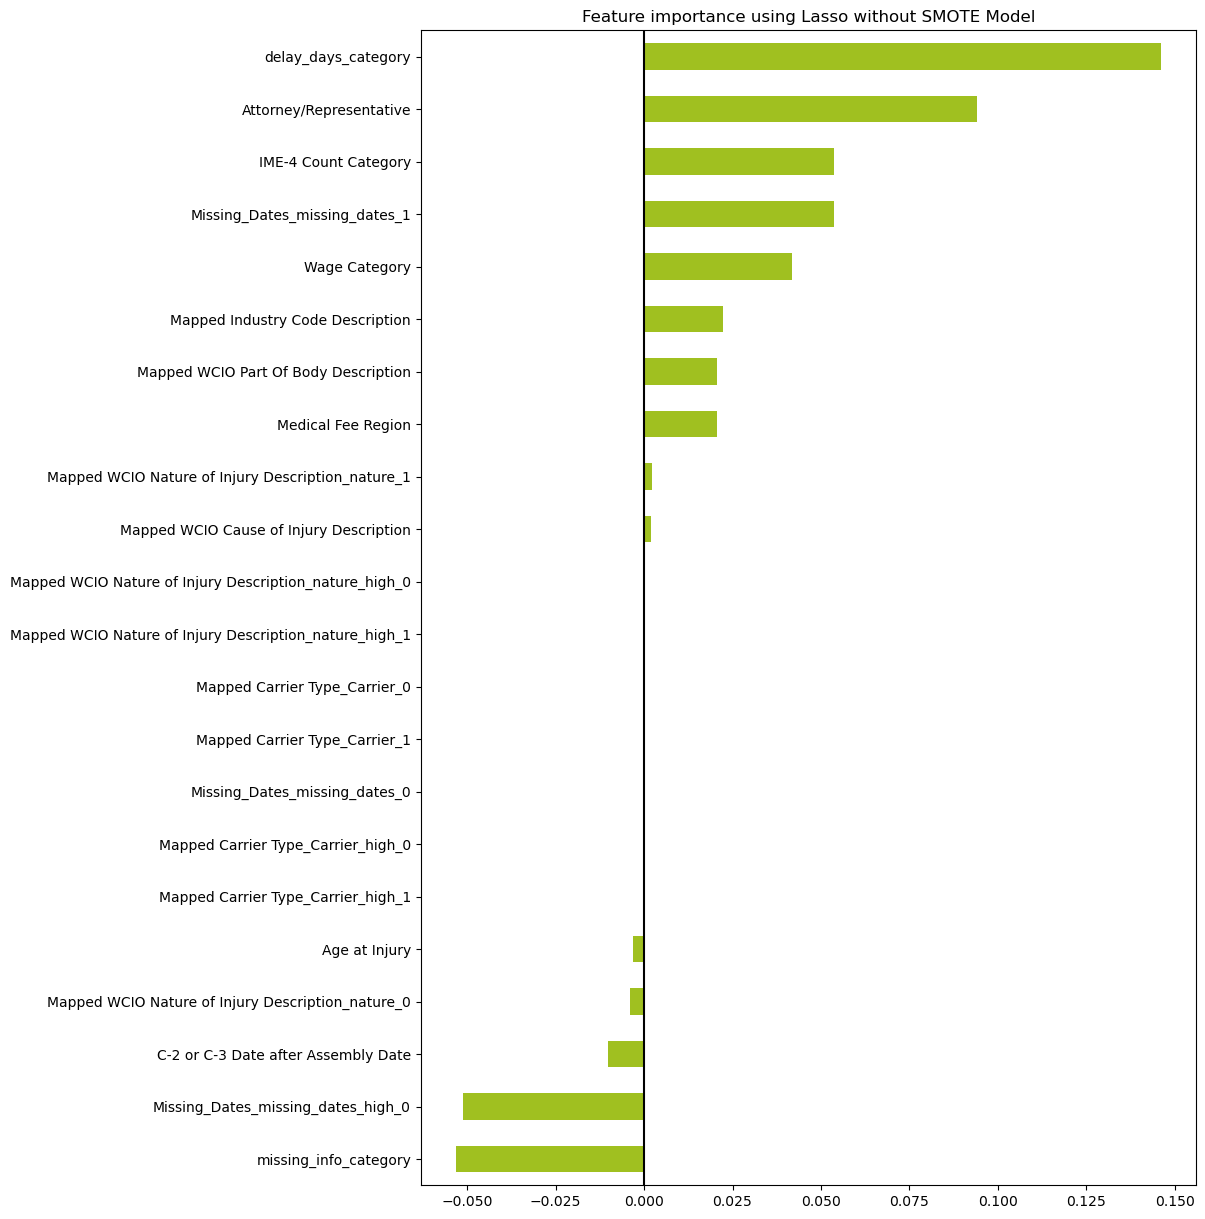

In [92]:
# Train Lasso without SMOTE
lasso_reg_no_smote = LassoCV(random_state=5)
lasso_reg_no_smote.fit(train_feature_selection, y_train_bin)
lasso_coef_no_smote = pd.Series(lasso_reg_no_smote.coef_, index=train_feature_selection.columns)

# Display results for Lasso without SMOTE
print(f"Lasso without SMOTE picked {sum(lasso_coef_no_smote != 0)} variables and eliminated {sum(lasso_coef_no_smote == 0)} variables")
plot_importance(lasso_coef_no_smote, 'Lasso without SMOTE', color='blue')

In [93]:
# Save results for Lasso without SMOTE
LASSO_no_smote_results = save_selected_features(
    'LASSO without SMOTE',
    lasso_coef_no_smote[lasso_coef_no_smote != 0].index.tolist(),
    train_feature_selection.columns.tolist()
)

#### =========================== 2. LASSO with SMOTE ===========================

In [95]:
# Apply SMOTE for handling imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(train_feature_selection, y_train_bin)

  File "C:\Users\catar\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Lasso with SMOTE picked 14 variables and eliminated 8 variables


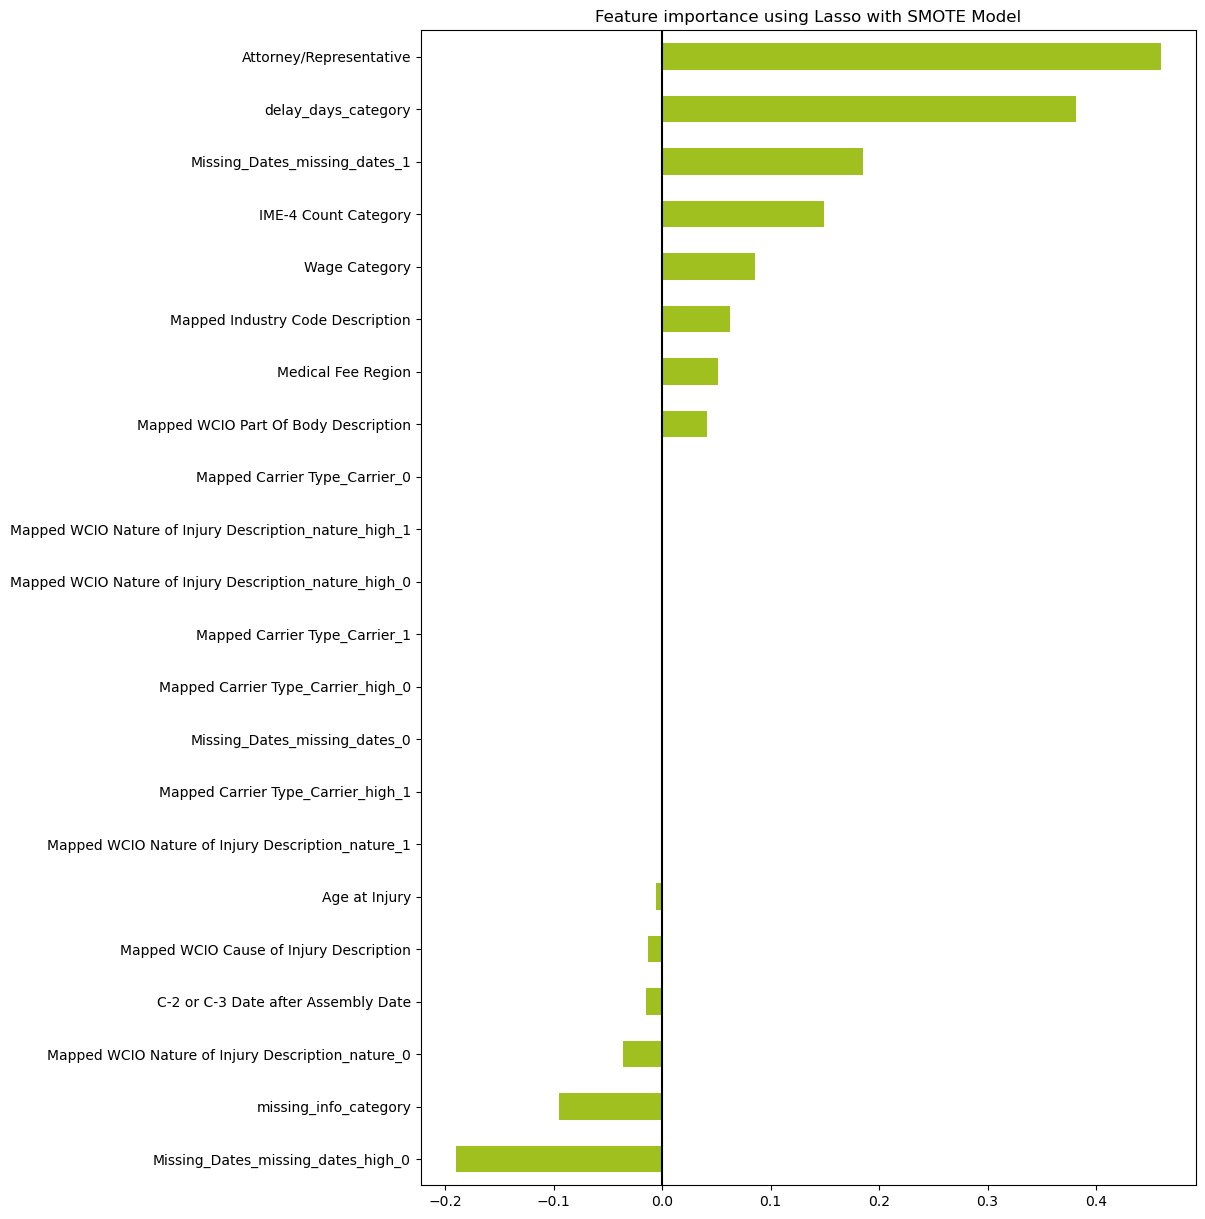

In [96]:
# Train Lasso with SMOTE
lasso_reg_smote = LassoCV(random_state=5)
lasso_reg_smote.fit(X_resampled, y_resampled)
lasso_coef_smote = pd.Series(lasso_reg_smote.coef_, index=train_feature_selection.columns)

# Display results for Lasso with SMOTE
print(f"Lasso with SMOTE picked {sum(lasso_coef_smote != 0)} variables and eliminated {sum(lasso_coef_smote == 0)} variables")
plot_importance(lasso_coef_smote, 'Lasso with SMOTE', color='orange')

In [97]:
# Save results for Lasso with SMOTE
LASSO_smote_results = save_selected_features(
    'LASSO with SMOTE',
    lasso_coef_smote[lasso_coef_smote != 0].index.tolist(),
    train_feature_selection.columns.tolist()
)

<a id = "DT"></a>
### Decision Tree

Decision trees are supervised learning algorithms that split data based on feature values to predict a target variable. During feature selection, decision trees identify the most important features by assessing how well they split the data at each node. Features that frequently appear in splits are likely more important for predicting the target.
This process naturally selects the most relevant features for predicting the target variable. In the case of imbalanced datasets, decision trees can handle class imbalance by incorporating techniques like class weighting, which penalizes misclassifications of the minority class. 

https://pages.stat.wisc.edu/~loh/treeprogs/guide/LohISI14.pdf

[Back to Index](#idx)

#### ==================================== 1. Standard Decision Tree ====================================

In [100]:
# Decision Tree considering imbalanced classes
dt_classifier = DecisionTreeClassifier(random_state=2024, class_weight='balanced')
dt_classifier.fit(train_feature_selection, y_train_bin)

DecisionTreeClassifier(class_weight='balanced', random_state=2024)

In [101]:
# Feature importances
dt_feature_importances = pd.Series(dt_classifier.feature_importances_, index=train_feature_selection.columns)

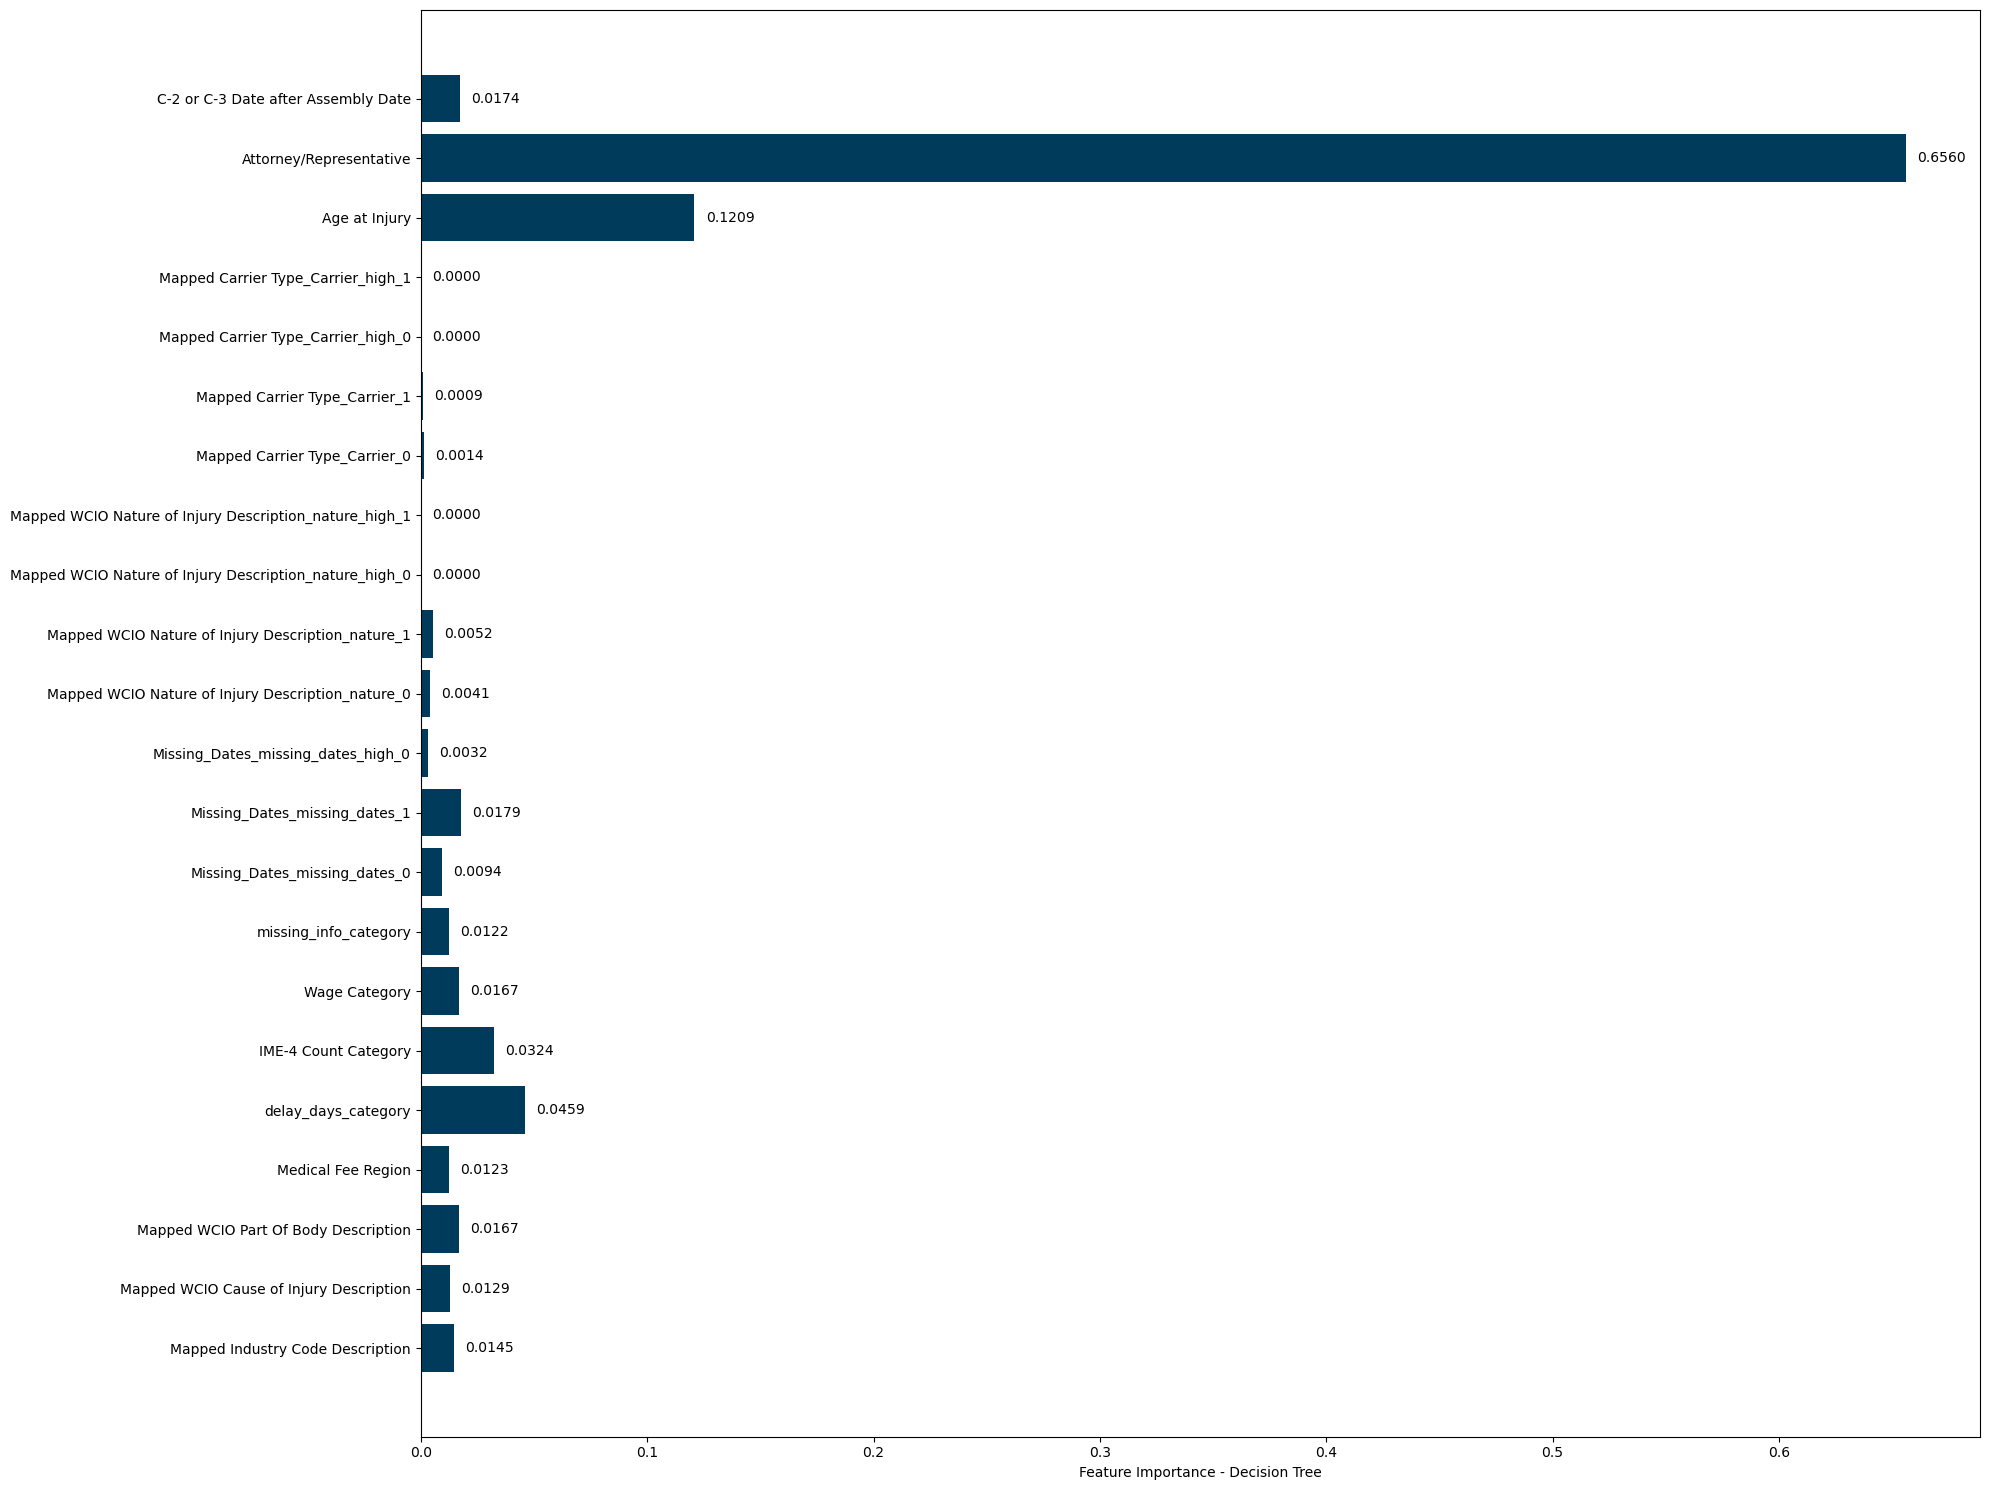

In [102]:
plt.figure(figsize=(20, 15))
bars = plt.barh(range(len(train_feature_selection.columns)), dt_classifier.feature_importances_, align='center', color=pal_novaims[1])
plt.yticks(np.arange(len(train_feature_selection.columns)), train_feature_selection.columns)

# Add the numerical values in front of each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.4f}', va='center', ha='left', fontsize=10)

plt.xlabel('Feature Importance - Decision Tree')
plt.tight_layout()
plt.show()

In [103]:
DT_df = pd.DataFrame(index=train_feature_selection.columns)
DT_df['DT_Importance'] = dt_feature_importances

In [104]:
# ====================  Importance-Based Selection ====================
def select_features(importances, threshold=0.99):
    sorted_importances = importances.sort_values(ascending=False)
    cumulative = np.cumsum(sorted_importances)
    selected_features = sorted_importances[cumulative <= threshold * cumulative[-1]].index
    return selected_features

# Selection by different methods
dt_selected_features = select_features(DT_df['DT_Importance'])

DT_df['Keep_DT'] = DT_df.index.isin(dt_selected_features)

In [105]:
def highlight_features(s):
    """Highlight cells in green for selected features."""
    return ['background-color: lightgreen' if v else '' for v in s]

styled_DT_df = DT_df.style.apply(
    highlight_features, subset=['Keep_DT']
)

styled_DT_df

,DT_Importance,Keep_DT
Mapped Industry Code Description,0.014453,True
Mapped WCIO Cause of Injury Description,0.012915,True
Mapped WCIO Part Of Body Description,0.016678,True
Medical Fee Region,0.012308,True
delay_days_category,0.045925,True
IME-4 Count Category,0.032387,True
Wage Category,0.016667,True
missing_info_category,0.012247,True
Missing_Dates_missing_dates_0,0.009414,True
Missing_Dates_missing_dates_1,0.017871,True


In [106]:
# results for each method
dt_std_results = save_selected_features('Standard_DT', dt_selected_features, train_feature_selection.columns.tolist())

<a id = "RF"></a>
### Random Forest

Random Forest is an ensemble of multiple decision trees, each trained on a random subset of data and features. It aggregates the results to improve prediction accuracy. For feature selection, Random Forest ranks features based on their importance in the ensemble. Important features contribute more to reducing the model's prediction error.

[Back to Index](#idx)

#### =========================== 1. Standard Random Forest ===========================

In [109]:
# Train a Random Forest considering imbalanced classes
rf_classifier = RandomForestClassifier(random_state=2024, class_weight='balanced')
rf_classifier.fit(train_feature_selection, y_train_bin)

# Feature importances
rf_feature_importances = pd.Series(rf_classifier.feature_importances_, index=train_feature_selection.columns)

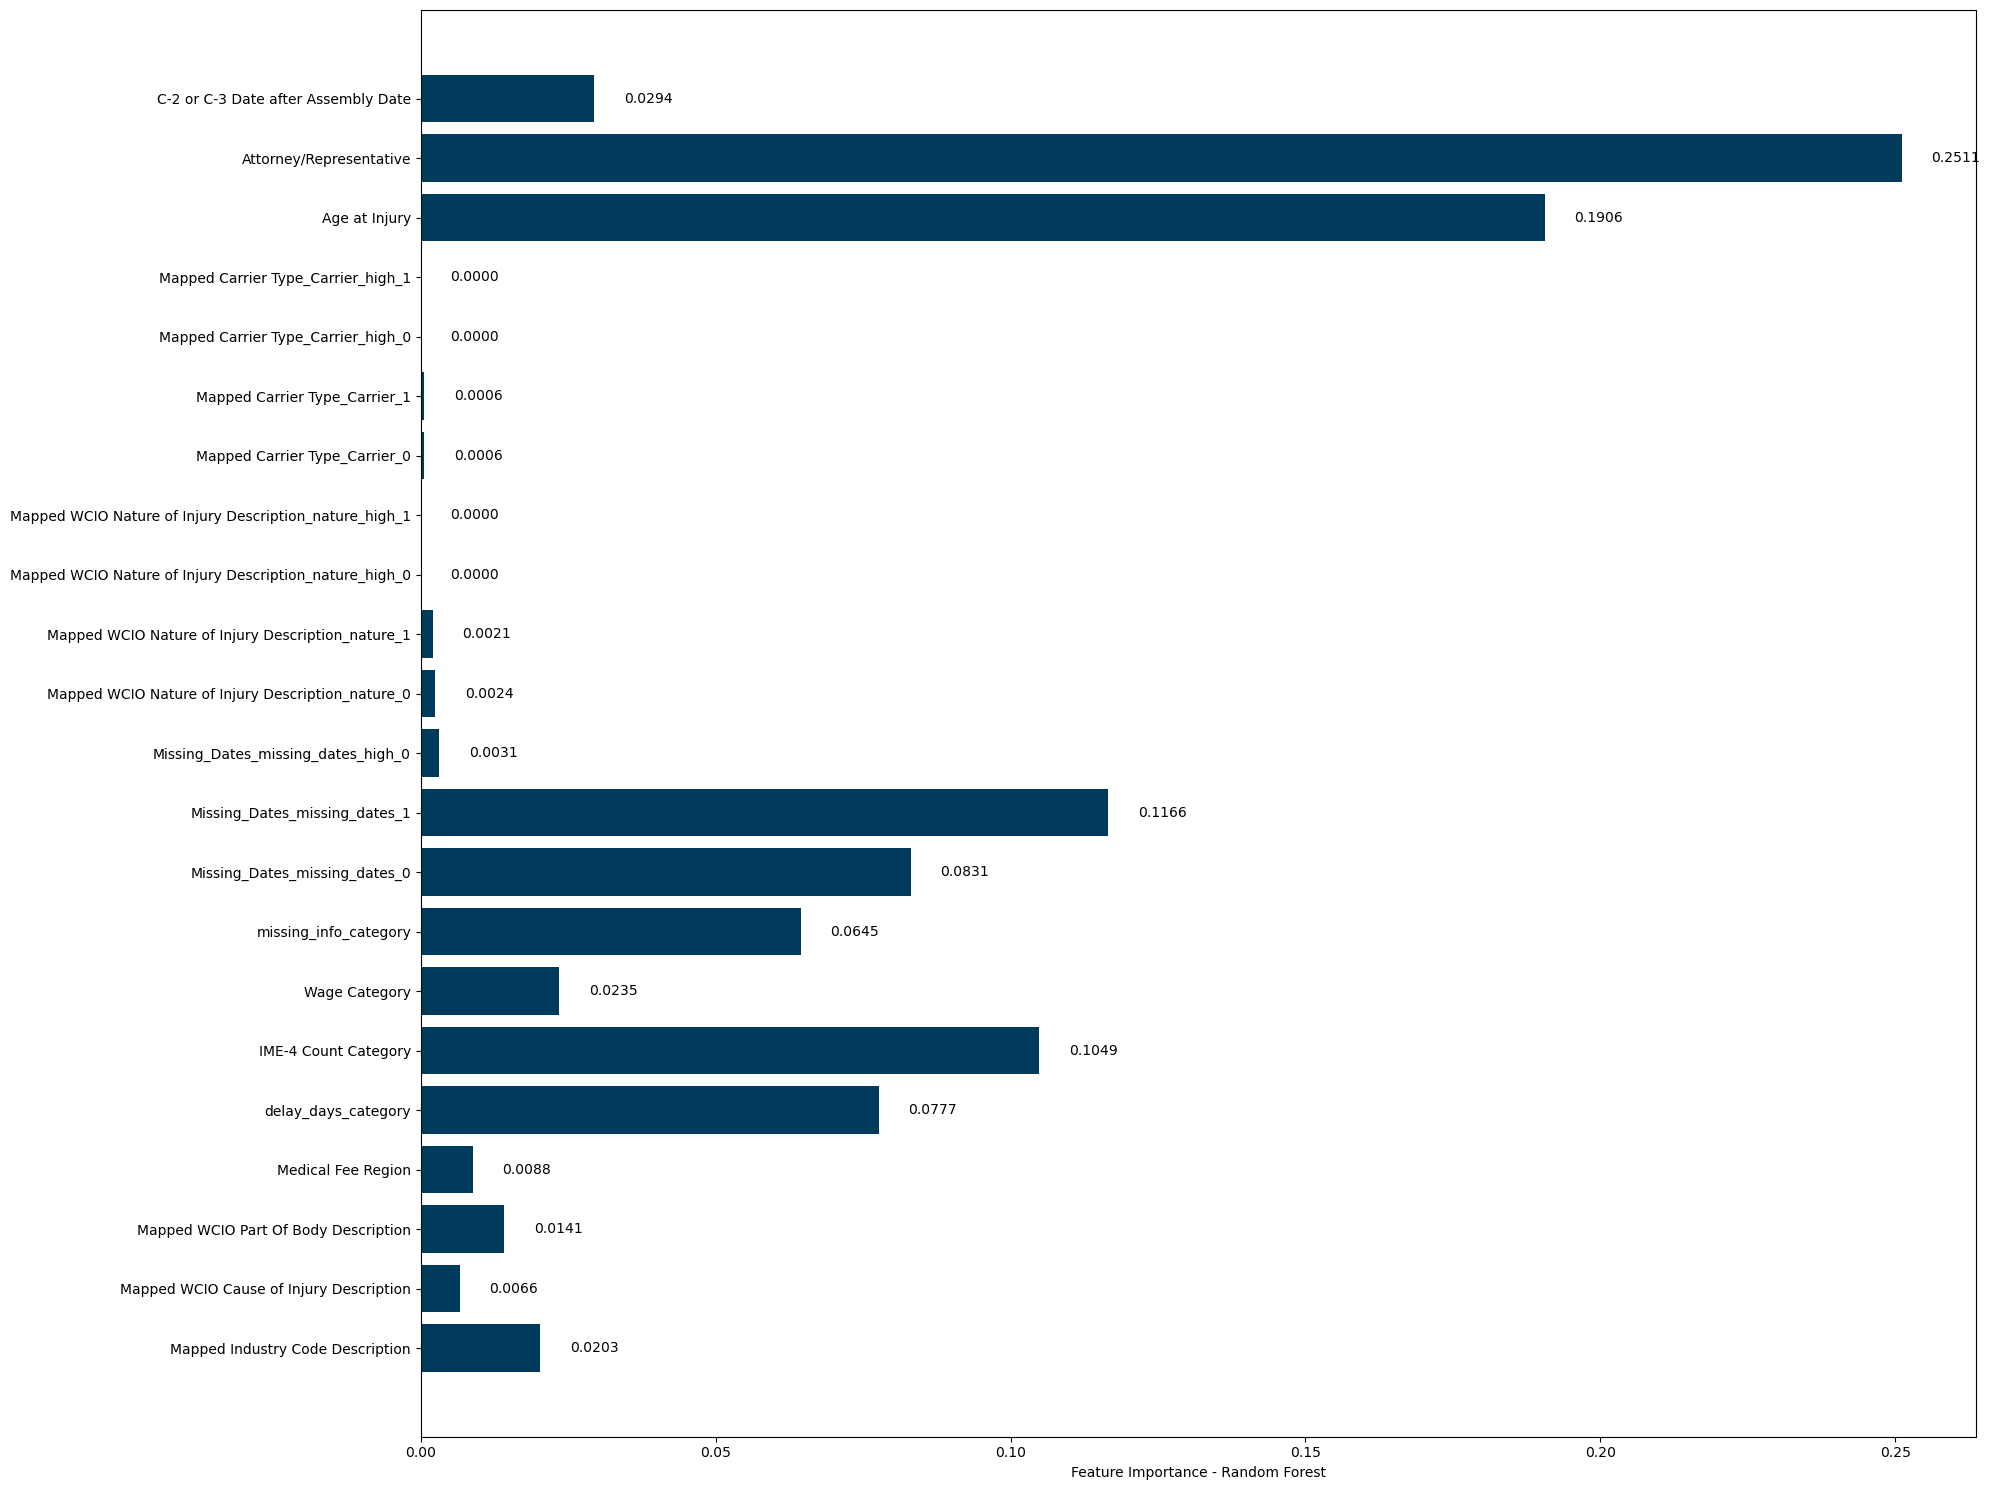

In [110]:
# Plot for the feature importances
plt.figure(figsize=(20, 15))
bars = plt.barh(range(len(train_feature_selection.columns)), rf_classifier.feature_importances_, align='center', color=pal_novaims[1])
plt.yticks(np.arange(len(train_feature_selection.columns)), train_feature_selection.columns)
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.4f}', va='center', ha='left', fontsize=10)

plt.xlabel('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

In [111]:
RF_df = pd.DataFrame(index=train_feature_selection.columns)
RF_df['RF_Importance'] = rf_feature_importances

In [112]:
# Selection by different methods
rf_selected_features = select_features(RF_df['RF_Importance'])
RF_df['Keep_RF'] = RF_df.index.isin(rf_selected_features)

In [113]:
st_RF_df = RF_df.style.apply(
    highlight_features, subset=['Keep_RF'])

st_RF_df

,RF_Importance,Keep_RF
Mapped Industry Code Description,0.020254,True
Mapped WCIO Cause of Injury Description,0.006606,False
Mapped WCIO Part Of Body Description,0.014144,True
Medical Fee Region,0.008805,True
delay_days_category,0.077670,True
IME-4 Count Category,0.104870,True
Wage Category,0.023507,True
missing_info_category,0.064484,True
Missing_Dates_missing_dates_0,0.083076,True
Missing_Dates_missing_dates_1,0.116574,True


In [114]:
# Save results for each method
rf_geral_results = save_selected_features('Standard_RF', rf_selected_features, train_feature_selection.columns.tolist())

<a id = "results"></a>
### Results

[Back to Index](#idx)

In [116]:
# Combine all results into a single dataframe
results_dfs = [
    spearman_results.set_index('Feature'),
    MI_results.set_index('Feature'),
    LASSO_no_smote_results.set_index('Feature'),
    LASSO_smote_results.set_index('Feature'),
    dt_std_results.set_index('Feature'),
    rf_geral_results.set_index('Feature')]

feature_selection = pd.concat(results_dfs, axis=1)

In [117]:
# list of 'Keep' features for each method
spearman_keep = feature_selection[feature_selection['Spearman_Result'] == 'Keep'].index.tolist()
MI_all_Result_keep = feature_selection[feature_selection['MI_all_Result'] == 'Keep'].index.tolist()  
LASSO_no_SMOTE_keep = feature_selection[feature_selection['LASSO without SMOTE_Result'] == 'Keep'].index.tolist() 
LASSO_w_SMOTE_keep = feature_selection[feature_selection['LASSO with SMOTE_Result'] == 'Keep'].index.tolist() 
Standard_DT_keep = feature_selection[feature_selection['Standard_DT_Result'] == 'Keep'].index.tolist()
Standard_RF_keep = feature_selection[feature_selection['Standard_RF_Result'] == 'Keep'].index.tolist()

In [118]:
def highlight_discarded_cells(val):
    color = 'red' if val == 'Discard' else ''  # Highlight "discard" values in red
    return f'background-color: {color}'

feature_selection = feature_selection.style.applymap(highlight_discarded_cells)

In [119]:
feature_selection

,Spearman_Result,MI_all_Result,LASSO without SMOTE_Result,LASSO with SMOTE_Result,Standard_DT_Result,Standard_RF_Result
Feature,,,,,,
Mapped Industry Code Description,Keep,Keep,Keep,Keep,Keep,Keep
Mapped WCIO Cause of Injury Description,Keep,Keep,Keep,Keep,Keep,Discard
Mapped WCIO Part Of Body Description,Keep,Keep,Keep,Keep,Keep,Keep
Medical Fee Region,Keep,Keep,Keep,Keep,Keep,Keep
delay_days_category,Keep,Keep,Keep,Keep,Keep,Keep
IME-4 Count Category,Keep,Keep,Keep,Keep,Keep,Keep
Wage Category,Keep,Keep,Keep,Keep,Keep,Keep
missing_info_category,Keep,Keep,Keep,Keep,Keep,Keep
Missing_Dates_missing_dates_0,Discard,Keep,Discard,Discard,Keep,Keep


<a id = "modelling"></a>

<div style="background-color: #003B5C; padding: 10px; border-radius: 8px; text-align: left; margin-top: 20px; margin-bottom: 20px;">
    <h2 style="color: white; margin: 0;">4. Modelling</h2>
</div>

[Back to Index](#idx)

### 1: We are going to use Cross Validation to choose the best combination of preprocessing, features and models.

In [122]:
def evaluate_model(
    train, y_train, model, cv=5, scaler_type='Standard',
    ordinal_columns=None, one_hot_columns=None, numerical_columns=None,
    use_smote=False, feature_set_name=None, features=None, outlier_treatment=True):
    """
    Evaluates a model using stratified cross-validation on the training set.
    """
    start_time = time.perf_counter()
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    
    # Initialize results storage
    cross_val_scores = {
        "accuracy_val": [],
        "precision_val": [],
        "recall_val": [],
        "f1_macro_train": [],
        "f1_macro_val": [],
        "confusion_matrix": np.zeros((len(np.unique(y_train)), len(np.unique(y_train)))), 
    }

    scaler = scaler_type
    #after the split we assure that the train and val folds are separated amd perform the preprocessing steps to each one
    #as a reminder, the val dataset is always treated in conformity with the train dataset
    for train_indices, val_indices in skf.split(train, y_train):
        # Split into train and validation subsets
        X_train_fold, y_train_fold = train.iloc[train_indices], y_train.iloc[train_indices]
        X_val_fold, y_val_fold = train.iloc[val_indices], y_train.iloc[val_indices]

        # Fit and apply transformations within each fold
        X_train_fold, X_val_fold = preprocessing_pipeline(X_train_fold, X_val_fold, test=None, outlier_treatment=outlier_treatment)
        X_train_fold_to_scale = apply_groupings(X_train_fold)
        X_val_fold_to_scale = apply_groupings(X_val_fold)
        
        if scaler or ordinal_columns or one_hot_columns or numerical_columns:
            X_train_fold = encoder_and_scaler(
                scaler, 
                fit_data=X_train_fold_to_scale, 
                df=X_train_fold_to_scale,
                ordinal_columns=ordinal_columns,
                one_hot_columns=one_hot_columns,
                numerical_columns=numerical_columns,
            )
            X_val_fold = encoder_and_scaler(
                scaler, 
                fit_data=X_train_fold_to_scale,  # Note: Always fit on the training fold
                df=X_val_fold_to_scale,
                ordinal_columns=ordinal_columns,
                one_hot_columns=one_hot_columns,
                numerical_columns=numerical_columns,
            )
        X_train_fold = reduce_memory_usage(X_train_fold, numerical_columns)
        X_val_fold = reduce_memory_usage(X_val_fold, numerical_columns)

        # Select features
        X_train_fold = X_train_fold[features]
        X_val_fold = X_val_fold[features]

        # LightGBM compatibility: Ensure column names are consistent and strings
        X_train_fold.columns = X_train_fold.columns.str.replace(r'[^\w\s]', '', regex=True).str.replace(' ', '_')
        X_val_fold.columns = X_val_fold.columns.str.replace(r'[^\w\s]', '', regex=True).str.replace(' ', '_')
        
        # Apply SMOTE if required
        if use_smote:
            smote = SMOTE(random_state=42)
            X_train_fold, y_train_fold = smote.fit_resample(X_train_fold, y_train_fold)

        # Train the model
        model.fit(X_train_fold, y_train_fold)

        # Predictions
        y_train_fold_pred = model.predict(X_train_fold)
        y_val_fold_pred = model.predict(X_val_fold)

        # Metrics
        cross_val_scores["accuracy_val"].append(accuracy_score(y_val_fold, y_val_fold_pred))
        cross_val_scores["precision_val"].append(precision_score(y_val_fold, y_val_fold_pred, average="macro"))
        cross_val_scores["recall_val"].append(recall_score(y_val_fold, y_val_fold_pred, average="macro"))
        cross_val_scores["f1_macro_train"].append(f1_score(y_train_fold, y_train_fold_pred, average="macro"))
        cross_val_scores["f1_macro_val"].append(f1_score(y_val_fold, y_val_fold_pred, average="macro"))
        #cross_val_scores["confusion_matrix"] += confusion_matrix(y_val_fold, y_val_fold_pred)

    # Aggregate metrics
    cross_val_metrics = {
        "cv_f1_macro_val_mean": np.mean(cross_val_scores["f1_macro_val"]),
        "cv_accuracy_val_mean": np.mean(cross_val_scores["accuracy_val"]),
        "cv_f1_macro_train_mean": np.mean(cross_val_scores["f1_macro_train"]),
        #"cv_f1_macro_train_std": np.std(cross_val_scores["f1_macro_train"]),
        #"cv_f1_macro_val_std": np.std(cross_val_scores["f1_macro_val"]),
    }

    # Overfitting calculation
    overfitting = cross_val_metrics["cv_f1_macro_train_mean"] - cross_val_metrics["cv_f1_macro_val_mean"]
    metrics = {
        **cross_val_metrics,
        "overfitting": overfitting,
        #"confusion_matrix": cross_val_scores["confusion_matrix"],
        "time": round(time.perf_counter() - start_time, 3),
    }
    print(f'cv_f1_macro_val_mean:{np.mean(cross_val_scores["f1_macro_val"])}')
    return metrics

def model_selection(
    train, y_train, feature_sets, models,
    scaler_type=["standard", "minmax"], smote_options=[True, False],
    ordinal_columns=None, one_hot_columns=None, numerical_columns=None, cv=5, outlier_treatment=True):
    """
    Model selection pipeline with support for scalers, SMOTE, and cross-validation.
    """
    ordinal_columns = ordinal_columns or []
    one_hot_columns = one_hot_columns or []
    numerical_columns = numerical_columns or []
    results = []
    iteration = 1
    total_iterations = len(scaler_type) * len(smote_options) * len(models) * len(feature_sets)

    for scaler in scaler_type:
        for model_name, model in models.items():
            print(f"\n=== Iteration {iteration}/{total_iterations} ===")
            print(f"Evaluating model: {model_name}")
            
            for use_smote in smote_options:
                print(f" Scaler: {scaler}, SMOTE: {use_smote}")
            
                # Evaluate each feature set within the model evaluation
                for feature_set_name, features in feature_sets.items():
                    print(f"  Using: {feature_set_name}")
                    metrics = evaluate_model(
                        train,
                        y_train,
                        model,
                        cv=cv,
                        scaler_type=scaler,
                        ordinal_columns=ordinal_columns,
                        one_hot_columns=one_hot_columns,
                        numerical_columns=numerical_columns,
                        use_smote=use_smote,
                        feature_set_name=feature_set_name,
                        features=features,
                        outlier_treatment=outlier_treatment
                    )

                    results.append({
                        "scaler": scaler,
                        "smote": use_smote,
                        "model": model_name,
                        "feature_set": feature_set_name,
                        **metrics
                    })

            iteration += 1

    return pd.DataFrame(results)

### 2: Using a fix validation set e are going to optimize hyperparameters.

In [124]:
def optimize_hyperparameters(X, y, model, param_grid, features=None):

    # Ensure features are specified
    if features is None:
        features = X.columns.tolist()

    # Split into train/validation
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, train_size=0.7, stratify=y, shuffle=True, random_state=42)

    # Preprocess data
    train, val = preprocessing_pipeline(X_train, X_val, test=None, outlier_treatment=True)
    train_to_scale = apply_groupings(train)
    val_to_scale = apply_groupings(val)

    def encode_and_scale(data_to_fit, data, method="standard"):
        return encoder_and_scaler(
            method,
            fit_data=data_to_fit, 
            df=data,
            ordinal_columns=ordinal_columns,
            one_hot_columns=one_hot_columns,
            numerical_columns=columns_to_scale
        )

    train = encode_and_scale(train_to_scale, train_to_scale)
    val = encode_and_scale(train_to_scale, val_to_scale)

    train = reduce_memory_usage(train, columns_to_scale)
    val = reduce_memory_usage(val, columns_to_scale)

    # Select features
    train = train[features]
    val = val[features]
    
    # ---- Data leakage problem ---- FROM THE CLASSES:
    # at this moment, our data is already split into training and
    #validation data. The class GridSearchCV performs cross-validation itself and it
    #would split the data again.

    #we can circumvent this problem by passing a PredefinedSplit object to the cv
    #parameter of the GridSearchCV class. This way, we can tell GridSearch what data
    #should be used for training and what data should be used for validation.
    # Combine train and validation datasets
    print("Shape train:", train.shape)
    print("Shape y_train:", y_train.shape)
    print("Shape val:", val.shape)
    print("Shape y_val:", y_val.shape)
    print(f"train index equals y_train index: {train.index.equals(y_train.index)}")
    print(f"train index equals y_train index: {val.index.equals(y_val.index)}")

    # Predefined split to avoid data leakage
    X_combined = np.concatenate([train, val])
    y_combined = np.concatenate([y_train, y_val])
    test_fold = [-1] * len(train) + [0] * len(val)

    print(f"Test fold: {len(test_fold)}")
    print(f"X_combined: {len(X_combined)}")
    print(f"y_combined: {len(y_combined)}")

    ps = PredefinedSplit(test_fold=test_fold)

    # Calculate the total number of iterations
    total_iters = len(param_grid) * 1  # PredefinedSplit doesn't multiply the folds

    # GridSearchCV setup
    grid_search = GridSearchCV(
        estimator=model, 
        param_grid=param_grid, 
        scoring='f1_macro',
        cv=ps, 
        n_jobs=-1, 
        return_train_score=True, 
        verbose=1, 
        refit=True
    )

    # Fit with progress monitoring
    grid_search.fit(X_combined, y_combined)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Predict and calculate metrics
    y_val_pred = best_model.predict(val)

    def calculate_metrics(y_true, y_pred):
        metrics = {
            "f1_macro_val": f1_score(y_true, y_pred, average='macro'),
            "f1_weighted_val": f1_score(y_true, y_pred, average='weighted'),
            "accuracy_val": accuracy_score(y_true, y_pred),
            "precision_val": precision_score(y_true, y_pred, average='weighted'),
            "recall_val": recall_score(y_true, y_pred, average='weighted'),
        }
        f1_per_class = f1_score(y_true, y_pred, average=None)
        class_metrics = {f"f1_class_{i}": f1 for i, f1 in enumerate(f1_per_class)}
        return {**metrics, **class_metrics}

    combined_metrics = calculate_metrics(y_val, y_val_pred)
    validation_metrics_df = pd.DataFrame([combined_metrics])

    print("Best parameters found:\n", best_params)
    print("-" * 120)
    display(validation_metrics_df)

    return best_model, best_params, validation_metrics_df

In [125]:
# Models
models = {
    # Linear Models
    #'Logistic Regression': LogisticRegression(random_state=5),
    
    # Tree-Based Models
    #'Decision Tree': DecisionTreeClassifier(random_state=5),
    #'Random Forest': RandomForestClassifier(random_state=5),
    #'Gradient Boosting': GradientBoostingClassifier(random_state=5),
    #'AdaBoost': AdaBoostClassifier(random_state=5),
    #'XGBoost': XGBClassifier(random_state=5),
    #'LightGBM': LGBMClassifier(random_state=5),
    #'CatBoost': CatBoostClassifier(random_state=5, verbose=0),

    # Proximity-Based Methods
    #'K Neighbors': KNeighborsClassifier(),
    
    # Bayesian Methods
    #'Gaussian Naive Bayes': GaussianNB(),
    
    # Neural Network-Based Models
    #'MLP Classifier': MLPClassifier(random_state=5, max_iter=500),

} #note: Perform Voting and Stacking in the end 

# Feature sets
feature_sets = {
    #'all': train_feature_selection.columns.tolist(),
    #'spearman': spearman_keep,
    #'MI_all': MI_all_Result_keep,
    #'LASSO_no_SMOTE': LASSO_no_SMOTE_keep,
    #'LASSO_w_SMOTE': LASSO_w_SMOTE_keep,
    #'Standard_DT': Standard_DT_keep,
    #'Standard_RF': Standard_RF_keep,
}

### Base results (Step 1 results):
in this step we are going to analyze the top performer feature set and the 4 Top performer models to then optimize hyperparameters.

In [127]:
'''base_models = model_selection(
    train=X,                 
    y_train=y,               
    feature_sets=feature_sets,     
    models=models,                
    scaler_type=["standard"],
    smote_options=[False], 
    ordinal_columns=ordinal_columns,   
    one_hot_columns=one_hot_columns,   
    numerical_columns=columns_to_scale, 
    cv=5, outlier_treatment=True)'''
#base_models.to_csv("base_models_BINARIA_LR.csv", index=False)

'base_models = model_selection(\n    train=X,                 \n    y_train=y,               \n    feature_sets=feature_sets,     \n    models=models,                \n    scaler_type=["standard"],\n    smote_options=[False], \n    ordinal_columns=ordinal_columns,   \n    one_hot_columns=one_hot_columns,   \n    numerical_columns=columns_to_scale, \n    cv=5, outlier_treatment=True)'

| Scaler    | SMOTE | Model                   | Feature Set       | CV F1 Macro Val Mean | CV Accuracy Val Mean | CV F1 Macro Train Mean | Overfitting | Time      |
|-----------|-------|-------------------------|-------------------|-----------------------|-----------------------|------------------------|-------------|-----------|
| standard  | False | K Neighbors            | Standard_RF       | 0.595882             | 0.941898             | 0.616364              | 0.020482    | 5671.825  |
| standard  | False | K Neighbors            | MI_all            | 0.592980             | 0.942571             | 0.624106              | 0.031127    | 4594.194  |
| standard  | False | K Neighbors            | LASSO_w_SMOTE     | 0.592541             | 0.942762             | 0.623690              | 0.031149    | 11421.355 |
| standard  | False | K Neighbors            | LASSO_no_SMOTE    | 0.592313             | 0.942771             | 0.623563              | 0.031250    | 16027.827 |
| standard  | False | K Neighbors            | all               | 0.592287             | 0.942727             | 0.623616              | 0.031329    | 5394.517  |
| standard  | False | K Neighbors            | spearman          | 0.592161             | 0.942689             | 0.623673              | 0.031511    | 5126.281  |
| standard  | False | K Neighbors            | Standard_DT       | 0.592158             | 0.942696             | 0.620935              | 0.028778    | 6650.860  |
| standard  | False | Gaussian Naive Bayes   | Standard_DT       | 0.581387             | 0.806235             | 0.581390              | 0.000003    | 308.438   |
| standard  | False | Gaussian Naive Bayes   | LASSO_no_SMOTE    | 0.578612             | 0.804018             | 0.578736              | 0.000124    | 315.267   |
| standard  | False | Gaussian Naive Bayes   | Standard_RF       | 0.577402             | 0.799922             | 0.577412              | 0.000010    | 305.032   |
| standard  | False | Gaussian Naive Bayes   | LASSO_w_SMOTE     | 0.572835             | 0.792396             | 0.572802              | -0.000032   | 304.604   |
| standard  | False | Gaussian Naive Bayes   | MI_all            | 0.569716             | 0.787342             | 0.569721              | 0.000005    | 316.233   |
| standard  | False | Random Forest          | spearman          | 0.559429             | 0.951952             | 0.626540              | 0.067111    | 503.805   |
| standard  | False | Random Forest          | all               | 0.559128             | 0.951913             | 0.626532              | 0.067404    | 516.375   |
| standard  | False | Random Forest          | LASSO_no_SMOTE    | 0.558928             | 0.951988             | 0.624329              | 0.065401    | 487.723   |
| standard  | False | Random Forest          | MI_all            | 0.558809             | 0.951999             | 0.624251              | 0.065442    | 518.296   |
| standard  | False | Random Forest          | LASSO_w_SMOTE     | 0.558746             | 0.951992             | 0.624271              | 0.065525    | 506.100   |
| standard  | False | Bagging Classifier     | spearman          | 0.558259             | 0.951356             | 0.625367              | 0.067108    | 420.370   |
| standard  | False | Bagging Classifier     | all               | 0.558244             | 0.951345             | 0.625392              | 0.067148    | 417.446   |
| standard  | False | Bagging Classifier     | LASSO_w_SMOTE     | 0.558018             | 0.951439             | 0.623093              | 0.065074    | 407.135   |
| standard  | False | Bagging Classifier     | MI_all            | 0.557944             | 0.951443             | 0.623205              | 0.065261    | 412.714   |
| standard  | False | Bagging Classifier     | LASSO_no_SMOTE    | 0.557777             | 0.951438             | 0.623091              | 0.065314    | 405.811   |
| standard  | False | Random Forest          | Standard_DT       | 0.554470             | 0.952298             | 0.610076              | 0.055606    | 505.872   |
| standard  | False | Decision Tree          | all               | 0.554229             | 0.951608             | 0.617650              | 0.063422    | 463.788   |
| standard  | False | Decision Tree          | spearman          | 0.554154             | 0.951595             | 0.617650              | 0.063497    | 426.053   |
| standard  | False | Decision Tree          | LASSO_w_SMOTE     | 0.554044             | 0.951701             | 0.615318              | 0.061274    | 385.687   |
| standard  | False | Decision Tree          | LASSO_no_SMOTE    | 0.554017             | 0.951737             | 0.615314              | 0.061298    | 396.041   |
| standard  | False | Bagging Classifier     | Standard_DT       | 0.553936             | 0.951896             | 0.609299              | 0.055363    | 415.705   |
| standard  | False | Decision Tree          | MI_all            | 0.553783             | 0.951671             | 0.615314              | 0.061531    | 395.045   |
| standard  | False | Bagging Classifier     | Standard_RF       | 0.550976             | 0.953013             | 0.590297              | 0.039321    | 414.873   |
| standard  | False	|Random Forest           | Standard_RF	     | 0.550532             | 0.953143             | 0.590211              | 0.039678    | 483.467   |
| standard  | False	| Decision Tree          | Standard_DT       | 0.550188             | 0.952216	           | 0.601167              | 0.050980    |	396.198  |
| standard  | False	| Decision Tree          |	Standard_RF      |	0.547601            |	0.953216	       |0.583345               |	0.035743 |	383.860  |
|standard   | False	| CatBoost               |	MI_all           |	0.543557	        |0.955023	           |0.554579	           |0.011022	 |2208.907   |
|standard   | False	| CatBoost               |	spearman         |	0.543326            |	0.955077           |	0.553523           |	0.010197 |	1410.293 |
|standard   | False	| Gradient Boosting      |	spearman         |	0.543252            |	0.955129           |	0.543522           |	0.000270 |	499.222  |
|standard   | False	| CatBoost               |	LASSO_w_SMOTE    |	0.543100            |	0.954976	       |0.554673	           |0.011573	 |2215.558   |
|standard   | False	| Gradient Boosting      |	LASSO_w_SMOTE    |	0.543089            |	0.955122           |	0.543497	       |0.000409     |	485.943  |
|standard   | False	| CatBoost               |	all              |	0.543074            |	0.955072           |	0.553400           |	0.010326 |1348.467   |
|standard   | False	| Gradient Boosting      |	LASSO_no_SMOTE   |	0.542947	        |0.955133              |0.543390               |	0.000443 |	490.195  |
|standard   | False	| Gradient Boosting      |	MI_all           |	0.542867	        |0.955122	           |0.543121               |	0.000254 |	490.748  |
|standard   | False	| CatBoost               |	LASSO_no_SMOTE   |	0.542737	        |0.954981              |	0.554681           |	0.011944 |	2629.579 |
|standard   | False	| Gradient Boosting      |	all              |	0.542734         	|0.955134              |0.543017               |	0.000282 |	506.924  |
|standard   | False	| Gradient Boosting      |	Standard_RF      |	0.542623	        |0.955150	           |0.542682               |	0.000058 |481.928    |
|standard   | False	| Gradient Boosting      |	Standard_DT      |	0.542576	        |0.955176	           |0.542873	           |0.000297     |	491.478  |
|standard   | False	| CatBoost               |	Standard_DT      |	0.542454            |	0.955046           |	0.551913           |	0.009458 |2093.162   |
|standard   | False	| MLP Classifier         |	LASSO_w_SMOTE    |	0.542226	        |0.955230	           |0.542570        	   |0.000344     | 	1327.448 |
|standard   | False	| XGBoost                |	LASSO_no_SMOTE   |	0.541880            |	0.955241           |	0.545988           |	0.004109 |866.986    |
|standard   | False	| XGBoost                |	spearman         |	0.541788            |	0.955242	       |0.546017               |	0.004229 |	815.286  |
|standard   | False	| XGBoost                |	LASSO_w_SMOTE    |	0.541695            |	0.955242           |	0.546258	       |0.004563     |	813.327  |
|standard   | False	| XGBoost                |	MI_all           |	0.541540            |	0.955222           |0.545840               |	0.004300 |	936.488  |
|standard   | False	| CatBoost               |	Standard_RF      |	0.541340            |	0.955044           |	0.550237           |	0.008897 |	2284.978 |
|standard   | False	| XGBoost                |	all              |	0.541106            |	0.955195	       |0.545704               |	0.004598 |	980.477  |
|standard   | False	| MLP Classifier         |	all              |	0.541019	        |0.955255              |	0.541992           |	0.000973 |	1681.188 |
|standard   | False	| XGBoost                |	Standard_DT      |	0.540889	        |0.955199              |	0.545112           |	0.004223 |	801.334  |
|standard   | False	| MLP Classifier         |	LASSO_no_SMOTE   |	0.540554        	|0.955296	           |0.540743               |	0.000189 |	1333.472 |
|standard   | False	| XGBoost|	Standard_RF  |	0.540279	     |0.955204	            |0.543918	|0.003639	|883.500|
|standard   | False	| MLP Classifier|	Standard_RF|	0.539915	|0.955230	|0.540207|	0.000291	|1292.082|
|standard   | False	| MLP Classifier|	spearman|	0.539290|	0.955289	|0.539956	|0.000666	|1720.363|
|standard   | False	| LightGBM|	LASSO_no_SMOTE|	0.539205|	0.955295	|0.540193|	0.000988	|1101.900|
|standard   | False	| LightGBM|	LASSO_w_SMOTE|	0.539135|	0.955289|	0.540318|	0.001183|	973.112|
|standard   | False	| LightGBM|	MI_all|	0.539120	|0.955303|	0.540247|	0.001127|	1174.136|
|standard   | False	| LightGBM|	spearman|	0.539087	|0.955302|	0.540094|	0.001008|	1029.832|
|standard   | False	| LightGBM|	all|	0.539055	|0.955302|	0.540034|	0.000979	|1183.222|
|standard   | False	| LightGBM|	Standard_DT|	0.538758|	0.955293	|0.539539	|0.000781|	1010.460|
|standard   | False	| MLP Classifier|	MI_all|	0.538636|	0.955291|	0.538886	|0.000250	|1372.674|
|standard   | False	| MLP Classifier	|Standard_DT|	0.538287|	0.955249	|0.538724	|0.000437|	1308.215|
|standard   | False	| LightGBM|	Standard_RF|	0.538087|	0.955260|	0.539109	|0.001022	|981.291|
|standard   | False	| Gaussian Naive Bayes|	all|	0.533763	|0.725037|	0.533768	|0.000005|	789.038|
|standard   | False	| Gaussian Naive Bayes|	spearman|	0.528877|	0.715907|	0.528940	|0.000063	|452.436|
|standard   | False	| AdaBoost|	spearman |	0.506680|	0.951112|	0.506774	|0.000095	|430.713|
|standard   | False	| AdaBoost|	all |	0.506677|	0.951108	|0.506774|	0.000097	|448.316|
|standard   | False	| AdaBoost|	LASSO_w_SMOTE|	0.506529|	0.951133|	0.506670	|0.000141|	432.406|
|standard   | False	| AdaBoost|	MI_all|	0.506529|	0.951133	|0.506670	|0.000141	|438.886|
|standard   | False	| AdaBoost|	LASSO_no_SMOTE|	0.506529|	0.951133|	|0.506670|	0.000141|	424.336|
|standard   | False	| AdaBoost|	Standard_DT|	0.505609|	0.951140|	0.505409|	-0.000200|	435.350|
|standard   | False	| AdaBoost|	Standard_RF|	0.505154|	0.951096|	0.505078|	-0.000077|	422.353|
|standard   | False	| Logistic Regression|	LASSO_no_SMOTE|	0.503488|	0.952142|	0.503493|	0.000005|	785.514|
|standard   | False	| Logistic Regression|	MI_all	|0.502759	|0.952122|	0.502873	|0.000115	|784.896|
|standard   | False	| Logistic Regression|	LASSO_w_SMOTE	|0.502500	|0.952147|	0.502681	|0.000181|	773.474|
|standard   | False	| Logistic Regression|	all|	0.502392	|0.952136	|0.502521	|0.000129|	807.517|
|standard   | False	| Logistic Regression|	Standard_RF|	0.502217	|0.952068|	0.502023|	-0.000193|	779.622|
|standard   | False	| Logistic Regression|	spearman|	0.501156	|0.952138	|0.500981	|-0.000175|	805.514|
|standard   | False	| Logistic Regression|	Standard_DT|	0.500142	|0.952112|	0.500052|	-0.000089	|787.735|

So:
- Random Forest with spearman feature selection got us a macro f1 of 0.559429 for the validation set and its a model with some overfitting = 0.067, so we will try to optimize it iin order to improve this.
- Gradient Boosting	with spearman got 0.543252	and improve the overfitting	2.702043e-04 so its worth the test to improve the score.
- MLP Classifier got good scores but its similiar to the Gradient Boosting and takes a lot more time.

#### Choosen features: 

In [131]:
features = spearman_keep

### Logistic Regression:
in this step we are going to analyze the top performer feature set and the 5 Top performer models to then optimize hyperparameters.

In [133]:
lr = LogisticRegression(random_state = 5)

In [134]:
# Define hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],  # 'l1' and 'l2' are sufficient for binary classification
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'class_weight': [None, 'balanced'],  # Handle class imbalance
    'solver': ['liblinear', 'saga'],  # Solvers supporting l1 and l2 penalties
    'multi_class': ['ovr']  # Only 'ovr' for binary classification
}

In [135]:
#optimize_hyperparameters(X,y,lr,param_grid,features=features)

### Random Forest:
in this step we are going to analyze the top performer feature set and the 5 Top performer models to then optimize hyperparameters.

In [137]:
rf = RandomForestClassifier(random_state=5)

In [138]:
# Optimized parameter space
rf_parameter_space = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 20, 30, 50, None],  # Limiting to avoid overfitting
    'max_features': ['sqrt', 'log2'],  # Most common for binary classification
    'n_estimators': [50, 100, 200, 300],  # Reduced range for efficiency
    'min_samples_split': [2, 5, 10, 20],  # Reasonable lower values
    'criterion': ['gini', 'entropy']  # Split criteria for classification
}

In [139]:
#optimize_hyperparameters(X, y, rf, rf_parameter_space, features=features)

### Gradient Boosting:
in this step we are going to analyze the top performer feature set and the 5 Top performer models to then optimize hyperparameters.

In [141]:
gb = GradientBoostingClassifier(random_state=5)

In [142]:
gb_parameters = {
    'loss': ['log_loss'],  # works best for binary problems
    'learning_rate': [0.01, 0.05, 0.1],  # low leaning rates can help with the imbalanced dataset we have
    'n_estimators': [100, 200, 300, 400, 500],  
    'max_features': ['sqrt', None], 
    'max_depth': [3, 5, 8, 10],  # max deep lower to avoid overfitting
    'subsample': [0.5, 0.7, 0.9, 1.0],  }

In [143]:
#optimize_hyperparameters(X, y, gb, gb_parameters, features=features)

### Gaussian Naive Bayes (GNB):
in this step we are going to analyze the top performer feature set and the Top 5 performer models to then optimize hyperparameters.

In [145]:
gnb = GaussianNB()

In [146]:
gnb_parameters = {
    'var_smoothing': [1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4, 5e-5, 1e-5, 1e-6, 1e-7]}

In [147]:
#optimize_hyperparameters(X, y, gnb, gnb_parameters, features=features)

### K Neighbors:
in this step we are going to analyze the top performer feature set and the Top 5 performer models to then optimize hyperparameters.

In [149]:
knn = KNeighborsClassifier(n_jobs=-1)

In [150]:
#X_small, _, y_small, _ = train_test_split(X, y, train_size=0.7, random_state=42)

In [154]:
#distribution = pd.Series(y_small).value_counts(normalize=True) 
#print(distribution)

In [156]:
knn_parameters = [
    {'n_neighbors': [5, 10, 15],
     'weights': ['uniform', 'distance'],
     'algorithm': ['auto', 'kd_tree'],
     'leaf_size': [20, 30],
     'metric': ['euclidean', 'manhattan']},  

    {'n_neighbors': [5, 10, 15],
     'weights': ['uniform', 'distance'],
     'algorithm': ['auto', 'kd_tree'],
     'leaf_size': [20, 30],
     'metric': ['minkowski'],
     'p': [1, 2]} # p only with minkowski
]

In [158]:
#optimize_hyperparameters(X_small, y_small, knn, knn_parameters, features=features)

### Optimal Models before ensemble:


| Model                | Best Parameters                                                                 |
|----------------------|----------------------------------------------------------------------------------|
| Logistic Regression  | {'C': 0.1, 'class_weight': 'balanced', 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'saga'} |
| Random Forest        | {'bootstrap': True, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50} |
| Gradient Boosting    | {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 10, 'max_features': None, 'n_estimators': 400, 'subsample': 0.5} |
| Gaussian Naive Bayes | {'var_smoothing': 0.1}                                                          |
| K Neighbors                  | {'algorithm': 'kd_tree', 'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'} |



| Model                | F1 Macro | F1 Weighted | Accuracy | Precision | Recall | F1 Class 0 | F1 Class 1 |
|----------------------|----------|-------------|----------|-----------|--------|------------|------------|
| K Neighbors                   | 0.629203 | 0.943409    | 0.952981 | 0.939905  | 0.952981| 0.975694   | 0.282713   |
| Random Forest        | 0.617829 | 0.945095    | 0.958742 | 0.952886  | 0.958742| 0.978782   | 0.256877   |
| Gradient Boosting    | 0.610554 | 0.944304    | 0.958486 | 0.952973  | 0.958486| 0.978658   | 0.24245    |
| Gaussian Naive Bayes | 0.610327 | 0.905235    | 0.881829 | 0.937611  | 0.881829| 0.935591   | 0.285062   |
| Logistic Regression  | 0.547283 | 0.818328    | 0.744687 | 0.954     | 0.744687| 0.846228   | 0.248337   |


In [162]:
# Models
optimal_models = {
    # Linear Models
    'Logistic Regression': LogisticRegression(C=0.1, class_weight='balanced', multi_class='ovr', penalty='l1', random_state=5, solver='saga'),

    # Tree-Based Models
    'Random Forest': RandomForestClassifier(max_depth=50, n_estimators=50, random_state=5), #{'bootstrap': True, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}
    'Gradient Boosting': GradientBoostingClassifier(max_depth=10, n_estimators=400, random_state=5, subsample=0.5), # {'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 10, 
    #'max_features': None, 'n_estimators': 400, 'subsample': 0.5}

    # Proximity-Based Methods
    'K Neighbors': KNeighborsClassifier(algorithm='kd_tree', leaf_size=20, metric='euclidean', n_jobs=-1, weights='distance'),
    
    # Bayesian Methods
    'Gaussian Naive Bayes': GaussianNB(var_smoothing=0.1),
    
} #note: Perform Voting and Stacking in the end 

# Feature sets
features = {'spearman': spearman_keep}

| scaler   | smote | model                | feature_set | cv_f1_macro_val_mean | cv_accuracy_val_mean | cv_f1_macro_train_mean | overfitting | time    |
|----------|-------|----------------------|-------------|----------------------|-----------------------|------------------------|-------------|---------|
| standard | False | Gaussian Naive Bayes  | spearman    | 0.610898             | 0.881843              | 0.610978               | 0.000080    | 758.439 |
| standard | True  | K Neighbors           | spearman    | 0.596192             | 0.936935              | 0.722850               | 0.126658    | 2909.294|
| minmax   | True  | K Neighbors           | spearman    | 0.596069             | 0.936269              | 0.727557               | 0.131488    | 8907.173|
| minmax   | False | Gaussian Naive Bayes  | spearman    | 0.593052             | 0.830297              | 0.593133               | 0.000081    | 822.295 |
| minmax   | False | K Neighbors           | spearman    | 0.590491             | 0.941483              | 0.650723               | 0.060232    | 6963.684|
| standard | False | K Neighbors           | spearman    | 0.590285             | 0.941700              | 0.650490               | 0.060205    | 2131.117|
| minmax   | True  | Gradient Boosting     | spearman    | 0.584111             | 0.830027              | 0.899787               | 0.315676    | 4450.863|
| standard | True  | Gradient Boosting     | spearman    | 0.583449             | 0.828457              | 0.898027               | 0.314578    | 3237.302|
| minmax   | True  | Random Forest         | spearman    | 0.582196             | 0.824661              | 0.900455               | 0.318259    | 1123.842|
| standard | True  | Random Forest         | spearman    | 0.581359             | 0.823879              | 0.898770               | 0.317411    | 806.274 |
| standard | False | Logistic Regression   | spearman    | 0.562950             | 0.772610              | 0.563214               | 0.000264    | 661.350 |
| standard | False | Random Forest         | spearman    | 0.559134             | 0.951777              | 0.627233               | 0.068099    | 627.404 |
| minmax   | False | Random Forest         | spearman    | 0.558856             | 0.951753              | 0.627224               | 0.068368    | 879.104 |
| minmax   | True  | Logistic Regression   | spearman    | 0.558390             | 0.762455              | 0.820133               | 0.261743    | 824.556 |
| standard | True  | Logistic Regression   | spearman    | 0.558092             | 0.761995              | 0.819978               | 0.261886    | 602.750 |
| minmax   | True  | Gaussian Naive Bayes  | spearman    | 0.556926             | 0.766444              | 0.801039               | 0.244112    | 797.147 |
| standard | False | Gradient Boosting     | spearman    | 0.556790             | 0.952244              | 0.621533               | 0.064743    | 1641.595|
| minmax   | False | Gradient Boosting     | spearman    | 0.556017             | 0.952237              | 0.621418               | 0.065401    | 2190.113|
| standard | True  | Gaussian Naive Bayes  | spearman    | 0.550128             | 0.765197              | 0.774775               | 0.224647    | 772.501 |
| minmax   | False | Logistic Regression   | spearman    | 0.539896             | 0.830245              | 0.541476               | 0.001580    | 932.441 |


- We have notice that SMOTE tends to increase the risk of overfitting, so it is best to avoid this option. 
- The Min-Max Scaler has shown some improvement in certain models, like the K-Neighbors model when SMOTE is set to False. However, the improvement is minimal, and it more than triples the time required to run the model. This trend is consistent across most models. It is possible that Min-Max Scaling increases model training time because it requires additional computation to calculate the minimum and maximum values for each feature and apply the transformation, especially when dealing with large datasets with a lot of features. Therefore, we will continue to use the Standard Scaler. 
- Gaussian Naive Bayes is the top candidate as it has the best F1 score (macro) and, most importantly, exhibits the least amount of overfitting (close to 0). Now, we are going to explore stacking and voting methods.

In [166]:
#optimal_models.to_csv("BI:optimal_models.csv", index=False)

## Ensemble best models

In [169]:
train_modelling, val_modelling, test_modelling = preprocessing_pipeline(train, val = val, test= test, outlier_treatment=True)

train_modelling_group = apply_groupings(train_modelling)
val_modelling = apply_groupings(val_modelling)
test_modelling = apply_groupings(test_modelling)

train_modelling = encoder_and_scaler("standard", train_modelling_group, train_modelling_group, ordinal_columns, one_hot_columns, columns_to_scale)
val_modelling = encoder_and_scaler("standard", train_feature_selection_group, val_modelling, ordinal_columns, one_hot_columns, columns_to_scale)
test_modelling = encoder_and_scaler("standard", train_feature_selection_group, test_modelling, ordinal_columns, one_hot_columns, columns_to_scale)

train_modelling = reduce_memory_usage(train_modelling, columns_to_scale)
val_modelling = reduce_memory_usage(val_modelling, columns_to_scale)
test_modelling = reduce_memory_usage(test_modelling, columns_to_scale)

Bounds for Age at Injury: Lower = -3.5, Upper = 88.5
Memory usage of dataframe is 68.98 MB
Memory usage after optimization is: 36.79 MB
Decreased by 46.7%
Memory usage of dataframe is 29.56 MB
Memory usage after optimization is: 15.77 MB
Decreased by 46.7%
Memory usage of dataframe is 66.60 MB
Memory usage after optimization is: 35.52 MB
Decreased by 46.7%


In [170]:
features = spearman_keep

In [171]:
# Models 
log_reg = LogisticRegression(C=0.1, class_weight='balanced', multi_class='ovr', penalty='l1', random_state=5, solver='saga')
random_forest = RandomForestClassifier(max_depth=50, n_estimators=50, random_state=5)
gradient_boosting = GradientBoostingClassifier(max_depth=10, n_estimators=400, random_state=5, subsample=0.5)
knn = KNeighborsClassifier(algorithm='kd_tree', leaf_size=20, metric='euclidean', n_jobs=-1, weights='distance')
gaussian_nb = GaussianNB(var_smoothing=0.1)

### Voting Classifier

The Voting Classifier combines predictions from multiple models through majority voting or averaged probabilities. The following models will be included based on their performance:

- **Gaussian Naive Bayes (GNB)**: This is the best-performing model, offering a good F1 score with minimal overfitting.
- **Gradient Boosting (GB) and Random Forest (RF)**: These models will also be included due to their accuracy. However, they tend to exhibit more overfitting. To mitigate this issue, they will be combined with Logistic Regression and GNB.
- **K-Nearest Neighbors (KNN)**: We will not use KNN because of the time it requires for computation. In addition, GNB has outperformed KNN in terms of the F1 score, while RF and GB have demonstrated better overall accuracy.

In [173]:
models = [
    ('Logistic Regression', log_reg),
    ('Random Forest', random_forest),
    ('Gradient Boosting', gradient_boosting),
    ('Gaussian Naive Bayes', gaussian_nb)]


base_models = [model for model in models if model[0] not in ['Logistic Regression', 'Gaussian Naive Bayes']]
combinations_list = []
for r in range(1, len(base_models) + 1):
    combinations_list.extend(combinations(base_models, r))

final_combinations = [
    [('Logistic Regression', log_reg), ('Gaussian Naive Bayes', gaussian_nb)] + list(comb)
    for comb in combinations_list]

Combination: ['Logistic Regression', 'Gaussian Naive Bayes', 'Gradient Boosting'], Weights: (2, 1, 2), Macro Avg F1-Score: 0.6284167704357746

#### Best voting model:

In [181]:
voting = VotingClassifier(
    estimators=[
        ('Logistic Regression', log_reg),
        ('Gaussian Naive Bayes', gaussian_nb),
        ('Gradient Boosting', gradient_boosting)],
    voting='soft', 
    weights=[2, 1, 2])

In [182]:
voting.fit(train_modelling[features], y_train_bin)

y_pred_voting = voting.predict(val_modelling[features])
y_prob_voting = voting.predict_proba(val_modelling[features])[:, 1]


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96    164172
           1       0.25      0.38      0.30      8036

    accuracy                           0.92    172208
   macro avg       0.61      0.66      0.63    172208
weighted avg       0.94      0.92      0.93    172208



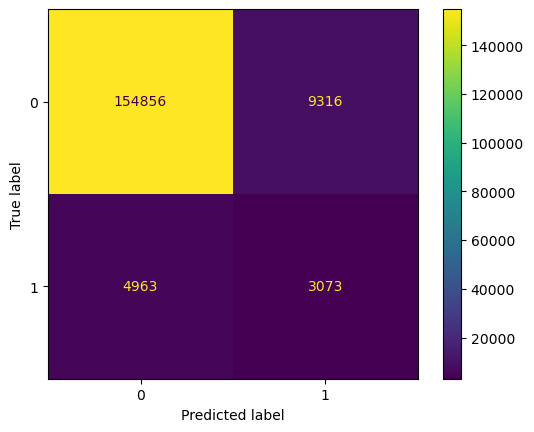

In [184]:
print("\nClassification Report:\n", classification_report(y_val_bin, y_pred_voting))
voting_cm = confusion_matrix(y_val_bin, y_pred_voting)
ConfusionMatrixDisplay(voting_cm).plot()

The results reveal challenges in predicting the minority class (label 1). Most of these instances are misclassified as the majority class (label 0). This issue arises due to the class imbalance in the dataset, where instances of label 0 significantly outnumber those of label 1. Consequently, the algorithm struggles to correctly identify label 1.

However, despite this limitation, the model demonstrates an improvement compared to previous attempts. It achieves a macro-average F1 score of 0.63, indicating moderate performance across both classes. The overall accuracy of 93% reflects the model's strong performance in predicting the majority class but highlights the problems in handling the minority class.

SMOTE was not an option in our case because it tends to increase the risk of overfittingy. Instead, we prioritized preserving the generalizability of our model to ensure performance on future, unseen cases.

### Stacking Classifier
The Stacking Classifier trains a meta-model on predictions from base models. For the best results:

- Base Models: Random Forest, Gradient Boosting, and KNN.
- Meta-Model: Logistic Regression as the final estimator because it is simple and effective in learning combinations of predictions.

In [187]:
estimators=[
        ('Gradient Boosting', gradient_boosting),
        ('Gaussian Naive Bayes', gaussian_nb)]

In [188]:
stacking = StackingClassifier(estimators = estimators,final_estimator=log_reg)

In [189]:
stacking.fit(train_modelling[features], y_train_bin)
y_pred = stacking.predict(val_modelling[features])
print("\nClassification Report:\n", classification_report(y_val_bin, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91    164172
           1       0.18      0.69      0.29      8036

    accuracy                           0.84    172208
   macro avg       0.58      0.77      0.60    172208
weighted avg       0.94      0.84      0.88    172208



### Final Result Evaluation
#### Model: **Voting Classifier** 

- Metrics Analysis
- ROC Curve and AUC & Precision-Recall Curve
- Precision-Recall Curve

#### Metrics:

In [192]:
voting

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=0.1, class_weight='balanced',
                                                 multi_class='ovr',
                                                 penalty='l1', random_state=5,
                                                 solver='saga')),
                             ('Gaussian Naive Bayes',
                              GaussianNB(var_smoothing=0.1)),
                             ('Gradient Boosting',
                              GradientBoostingClassifier(max_depth=10,
                                                         n_estimators=400,
                                                         random_state=5,
                                                         subsample=0.5))],
                 voting='soft', weights=[2, 1, 2])

| scaler   | smote | model                | feature_set | cv_f1_macro_val_mean | cv_accuracy_val_mean | cv_f1_macro_train_mean | overfitting | time    |
|----------|-------|----------------------|-------------|----------------------|-----------------------|------------------------|-------------|---------|
| standard | False |   Voting Classifier  | spearman    | 0.634271             | 0.896033	           | 0.653097               | 0.018826    | 2637.047 |

We observe that the model shows slightly more overfitting (0.04) than the Gaussian Naive Bayes alone. However, the combination of models reduces the overfitting previously observed in Gradient Boosting and Random Forest (which was 0.06). Additionally, the ensemble achieves a better average F1 score and improves accuracy when compared to Gaussian Naive Bayes alone.

#### ROC Curve and AUC & Precision-Recall Curve

In [197]:
def analyze_model_performance(y_true, y_pred, y_prob, class_labels=None):
    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_true, y_prob)

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

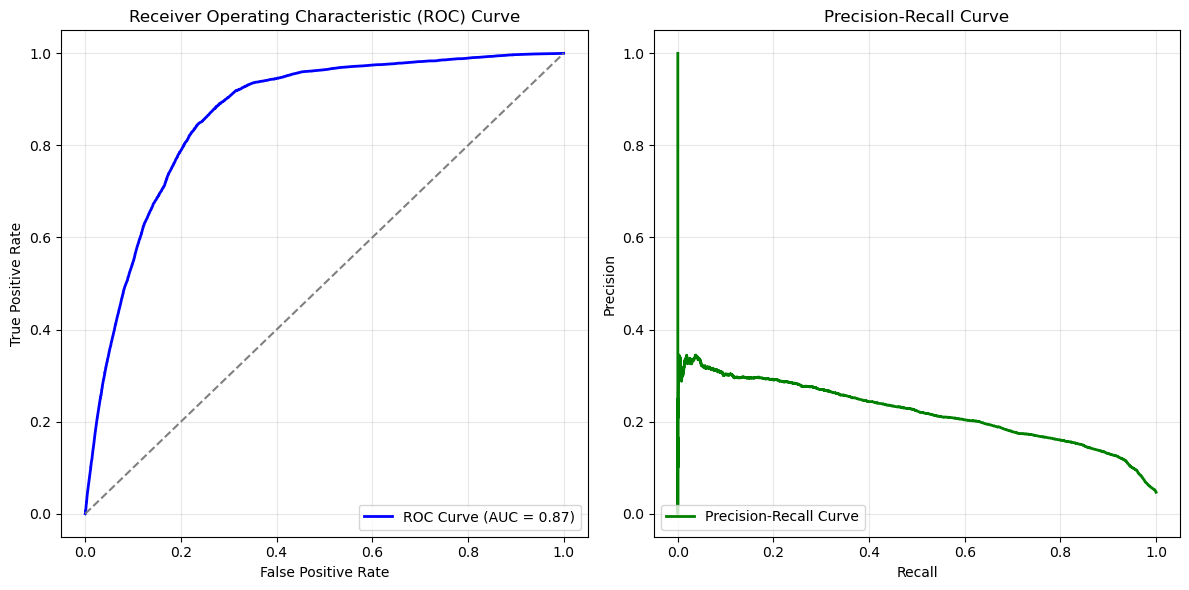

In [198]:
analyze_model_performance(y_val_bin, y_pred_voting, y_prob_voting, class_labels=['Class 0', 'Class 1'])

- The AUC (Area Under the Curve) is 0.87, which indicates good model performance. A perfect model would have an AUC of 1.0
- The Precision-Recall Curve evaluates the trade-off between precision (positive predictive value) and recall (sensitivity). The curve shows a sharp drop at the beginning, which suggests that the model is highly confident for a small subset of predictions. However, precision decreases as recall increases and the model maintains moderate precision across most recall values.

#### Comparing with Gaussian Naive Bayes:

In [201]:
gaussian_nb.fit(train_modelling[features], y_train_bin)

y_pred_gaussian_nb = gaussian_nb.predict(val_modelling[features])
y_prob_gaussian_nb = gaussian_nb.predict_proba(val_modelling[features])[:, 1]

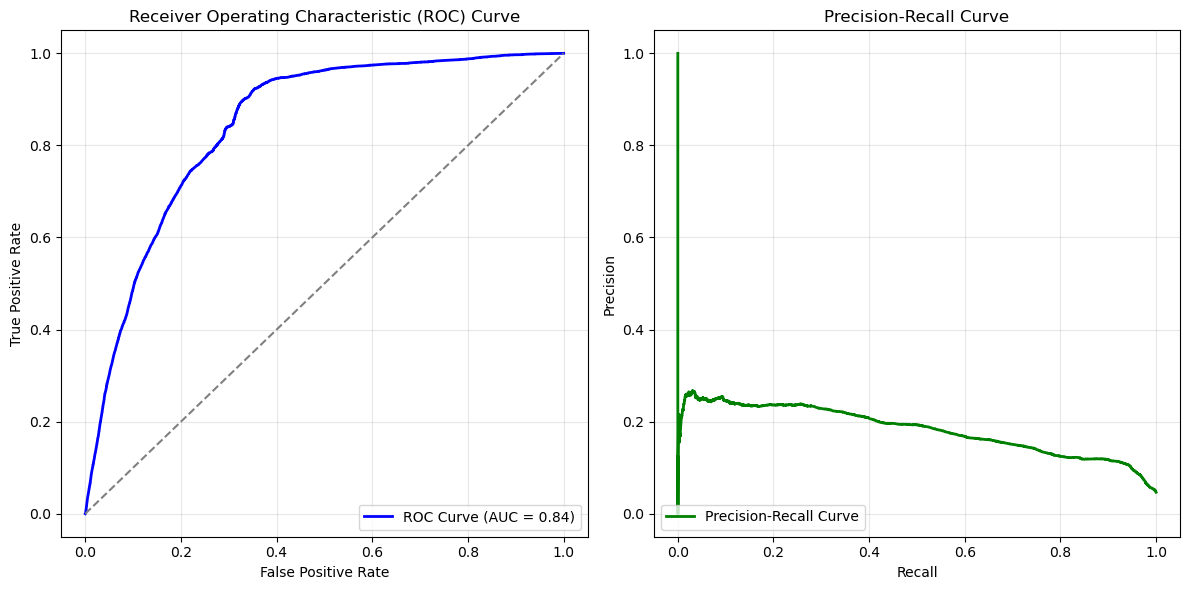

In [202]:
analyze_model_performance(y_val_bin, y_pred_gaussian_nb, y_prob_gaussian_nb, class_labels=['Class 0', 'Class 1'])

When comparing with the second best model, the Gaussian Naive Bayes model, we can see that both the AUC (wich now is 0.84) and the Precision-Recall Curve, wich now drops much faster ( we can see that in the voting model we drop below 0.2 in the 0.6 recall thereshold and now we drop initially and aprox. 0.5 thereshold). 

### Final Results: Voting Classifier 

In [205]:
voting.fit(train_modelling[features], y_train_bin)
test_pred_voting = voting.predict(test_modelling[features])

In [206]:
test_pred_voting_list = test_pred_voting.tolist()
test_binary_pred = pd.read_csv("sample_submission.csv", index_col='Claim Identifier')
test_binary_pred["Agreement Reached"] = test_pred_voting_list
test_binary_pred.drop(columns=['Claim Injury Type'], inplace = True)
test_binary_pred.to_csv('test_binary_pred.csv')

In [207]:
test_binary_pred.head()

,Agreement Reached
Claim Identifier,
6165911,0
6166141,0
6165907,0
6166047,0
6166102,0
